<a href="https://colab.research.google.com/github/armando-lv/BEDU-Equipo3-AnalisisPython/blob/main/Notebook_Proyecto_final_(Data_Science_F3%2C_M1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# _**BEDU** | DATA SCIENCE_
## _**MÓDULO 1** (FASE 3) | ANÁLISIS DE DATOS CON PYTHON_
#### _**PROYECTO FINAL** | Colab NOTEBOOK (EQUIPO 3)_

>#### _**ANTES DE COMENZAR...**_
>
> _¿Qué te parece si nos ubicamos dentro del mismo contexto?_

Desde el módulo pasado el Equipo 3 seleccionó una problemática social de interés común, a partir de la cual se redactó un escrito guía que facilitó el inicio del presente análisis de datos.

Si tienes curiosidad por conocer el escrito antes mencionado, puedes visitar este [enlace](https://docs.google.com/document/d/1wwfUJ4ZAmH6cBWL_miKNlR_3_5xI5iKGUcqG-Ijl-J4/edit) y darle un vistazo. Sin embargo, para lograr contextualizarnos, bastará con mencionar el objetivo general que perseguimos con este trabajo. Es decir: `Determinar la postura ideológica predominante entre la población mexicana hacia el fenómeno de vacunación COVID19, evaluando distintos aspectos de aceptación, así como posibles rasgos sociológicos y conductuales que estén implicados en el tema`.

Cabe mencionar también que los conjuntos de datos utilizados a continuación fueron procesados previamente, organizados y situados en archivos `.csv`; de modo entonces que el presente _Notebook_ da inicio con una lectura de dichos archivos.

Finalmente, si tienes curiosidad por conocer el origen de nuestros datos y el procedimiento que seguimos para procesarlos, puedes visitar el siguiente [enlace](https://colab.research.google.com/drive/1irL6j0hV3PCo--oHpsDgedOZjckVLVX0#scrollTo=6avDa8Wuzm3i) y darle un vistazo al _Notebook_ que creamos desde el módulo anterior.

> _**ADEMÁS...**_
>
> _En este punto del desarrollo, afortunadamente ya se tiene una perspectiva mucho más clara de la problemática. Por lo tanto, se identificaron ya, de manera precisa, cuáles son los datos que nos servirán para responder adecuadamente nuestras preguntas y cuáles no._
>
> _De modo que sí o sí es necesario aplicar nuevamente un pequeño procesamiento, con la intención de optimizar el análisis de nuestros datos y reducir el tamaño de nuestros datsets_.

In [ ]:
import pandas as pd # Se importa la primera librería que vamos a utilizar.

In [ ]:
ruta_de_acceso = "https://raw.githubusercontent.com/armando-lv/BEDU-Equipo3-AnalisisPython/main" # Accedemos a nuestros conjuntos, que están en nuestro repositorio de GitHub

In [ ]:
df1 = pd.read_csv(ruta_de_acceso + "/Dataset_1.csv", index_col = 0, header = [0, 1], engine='python')
df1.rename(columns = {"Unnamed: 3_level_0": ""}, inplace = True) # 'Dataset' 1.

df2 = pd.read_csv(ruta_de_acceso + "/Dataset_2.csv", index_col = 0, header = [0, 1], engine='python')
df2.rename(columns = {"Unnamed: 3_level_0": ""}, inplace = True) # 'Dataset' 2.

df3 = pd.read_csv(ruta_de_acceso + "/Dataset_3.csv", index_col = 0, header = [0, 1], engine='python')
df3.rename(columns = {"Unnamed: 3_level_0": ""}, inplace = True) # 'Dataset' 3.

In [ ]:
df1_dropped = df1.drop(columns = [("know_people_sick", "indicator_percentage"),
                                  ("know_people_sick", "sample_size"),
                                  ("food_lackness_concern", "indicator_percentage"),
                                  ("food_lackness_concern", "sample_size")]) # Se eliminan las columnas del primer 'dataset' que se consideraron poco
                                                                             # útiles para responder nuestras preguntas.
df2_dropped = df2.drop(columns = [("trust_politicians_recommendation", "indicator_percentage"),
                                  ("trust_politicians_recommendation", "sample_size")]) # Se eliminan las columnas del segundo 'dataset' que se consideraron
                                                                                        # poco útiles para responder nuestras preguntas.

# Nota que el tercer conjunto de datos quedó intacto, pues eventualmente todas sus columnas nos aportarán información para responder preguntas.

> _**AHORA SÍ, SIN MÁS POR EL MOMENTO...**_
>
> _¿Qué te parece si comenzamos?_

In [ ]:
!pip install plotly --upgrade; # Esta línea de código se utiliza para actualizar la librería 'plotly', la cual se utilizará más adelante.

     |████████████████████████████████| 23.9 MB 1.5 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
# Se declara el resto de paquetes y librerías que se utilizarán a lo largo de este 'Notebook'.
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
import math

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import skew, kurtosis

**Tomando los siguientes indicadores: `accept_vaccine (df2)`, `financial_concern (df1)` y `barrier_side_effects (df3)` obtén las siguientes medidas de estadística para cada uno de ellos: 'mean', 'weighted mean', 'trimmed mean', 'median', 'std', 'range', 'percetile 0.25', 'percentile 0.75' y 'IQR'. Almacena los resultados en un _dataframe_ con índices apropiados, tanto para filas como para columnas**.

> **¡Debes notar que...!**
>
> se calculó la **media ponderada** de los indicadores `accept_vaccine`, `financial_concern` y `barrier_side_effects`, porque el tamaño o "peso" de las muestras con las cuales se obtuvieron sus respectivos porcentajes variaba diariamente.
>
> No obstante, por comodidad y para facilitarnos el manejo de los datos, en todos los procedimientos posteriores se utilizará la media aritmética simple. Nótese que únicamente se pretende demostrar lo aprendido durante el curso y aplicar las herramientas computacionales que este nos brindó. Por lo tanto, resulta indistinto qué medida de estadística se utilice.

Por otro lado, a continuación se enuncia brevemente el significado de los indicadores antes utilizados:

`accept_vaccine`: indica cuál es el porcentaje de la población que acepta la vacuna.

`financial_concern`: indica cuál es el porcentaje de la población que se preocupa por su estado financiero (hasta cierto punto es un indicador del estatus socioeconómico de quienes contestaron la encuesta).

`barrier_side_effects`: inidica cuál es el porcentaje de la población que considera que los efectos secundarios de la vacuna son un impedimento para aplicársela.

#### _**Sesión 1:** Estimados de locación y variabilidad_

**Tomando los siguientes indicadores: `accept_vaccine (df2)`, `financial_concern (df1)` y `barrier_side_effects (df3)` obtén las siguientes medidas de estadística para cada uno de ellos: 'mean', 'weighted mean', 'trimmed mean', 'median', 'std', 'range', 'percetile 0.25', 'percentile 0.75' y 'IQR'. Almacena los resultados en un _dataframe_ con índices apropiados, tanto para filas como para columnas**.

> **¡Debes notar que...!**
>
> se calculó la **media ponderada** de los indicadores `accept_vaccine`, `financial_concern` y `barrier_side_effects`, porque el tamaño o "peso" de las muestras con las cuales se obtuvieron sus respectivos porcentajes variaba diariamente.
>
> No obstante, por comodidad y para facilitarnos el manejo de los datos, en todos los procedimientos posteriores se utilizará la media aritmética simple. Nótese que únicamente se pretende demostrar lo aprendido durante el curso y aplicar las herramientas computacionales que este nos brindó. Por lo tanto, resulta indistinto qué medida de estadística se utilice.

Por otro lado, a continuación se enuncia brevemente el significado de los indicadores antes utilizados:

`accept_vaccine`: indica cuál es el porcentaje de la población que acepta la vacuna.

`financial_concern`: indica cuál es el porcentaje de la población que se preocupa por su estado financiero (hasta cierto punto es un indicador del estatus socioeconómico de quienes contestaron la encuesta).

`barrier_side_effects`: inidica cuál es el porcentaje de la población que considera que los efectos secundarios de la vacuna son un impedimento para aplicársela.

##### **Financial_concern**

###### **Limpieza del df1**

In [ ]:
df1_dropped.head(2) ## Revisamos la nueva configuración del df1

survey_information              ...    financial_concern            
  region_where_applied survey_date  ... indicator_percentage sample_size
0       Aguascalientes  2020-11-23  ...             0.630136        6991
1       Aguascalientes  2020-11-24  ...             0.619214        7853

[2 rows x 9 columns]

In [ ]:
df1_columnas_sin_indexar=df1_dropped.copy() 
df1_columnas_sin_indexar.columns=df1_columnas_sin_indexar.columns.droplevel(0)
df1_columnas_sin_indexar.head(2) #Aqui lo que se hace es crear un nuevo df pero sin multi-indice
# Tener cuidado de solo ejecutar esta celda una vez, ya que intentar hacerlo de nuevo va a dar un error ya que el multi-indice ya fue eliminado

,region_where_applied,survey_date,survey_date_short,indicator_percentage,sample_size,indicator_percentage,sample_size,indicator_percentage,sample_size
0,Aguascalientes,2020-11-23,2020-11,0.023153,8453,0.899553,7455,0.630136,6991
1,Aguascalientes,2020-11-24,2020-11,0.020100,9490,0.901764,8354,0.619214,7853


In [ ]:
df_1_financial_corcern=df1_columnas_sin_indexar.iloc[:,[0,2,7,8]]
df_1_financial_corcern.head(2) ## Separamos las columnas que solo corresponden a financial_concern

,region_where_applied,survey_date_short,indicator_percentage,sample_size
0,Aguascalientes,2020-11,0.630136,6991
1,Aguascalientes,2020-11,0.619214,7853


In [ ]:
amount_of_positive_answers=df_1_financial_corcern.sample_size*df_1_financial_corcern.indicator_percentage 
df_1_financial_corcern.insert(4,'amount_of_positive_answers',amount_of_positive_answers)
df_1_financial_corcern.head(2) #Insertamos una tercero columna para poder hacer todo el analisis sobre la misma

,region_where_applied,survey_date_short,indicator_percentage,sample_size,amount_of_positive_answers
0,Aguascalientes,2020-11,0.630136,6991,4405.280776
1,Aguascalientes,2020-11,0.619214,7853,4862.687542


###### **Media**

In [ ]:
media=df_1_financial_corcern['amount_of_positive_answers'].mean() #Media
mediatot_01=df_1_financial_corcern['sample_size'].mean()
print(f'El promedio de personas que se preocuparon por la situación financiera en México en todo el periodo por muestra es de {round(media,0)} de un promedio total de {round(mediatot_01,0)} personas entrevistadas por muestra.')
print(f'Dando un promedio diario del {round(100*media/mediatot_01,2)}% de asistentes preocupados por la situación financiera.')

El promedio de personas que se preocuparon por la situación financiera en México en todo el periodo por muestra es de 3365.0 de un promedio total de 5612.0 personas entrevistadas por muestra.
Dando un promedio diario del 59.96% de asistentes preocupados por la situación financiera.


###### **Media ponderada**

In [ ]:
Total_personas_entrevistadas=df_1_financial_corcern['sample_size'].sum()
weight_of_sample=df_1_financial_corcern['sample_size']/Total_personas_entrevistadas
df_1_financial_corcern_02=df_1_financial_corcern.copy() #Creamos un nuevo df para el calculo de la media ponderada
df_1_financial_corcern_02.insert(4,'weight_of_sample',weight_of_sample)
df_1_financial_corcern_02.head(2) #Aplicamos una regla de tres simple para obtener el peso de la muestra en relación del total de muestras

,region_where_applied,survey_date_short,indicator_percentage,sample_size,weight_of_sample,amount_of_positive_answers
0,Aguascalientes,2020-11,0.630136,6991,0.000176,4405.280776
1,Aguascalientes,2020-11,0.619214,7853,0.000198,4862.687542


In [ ]:
# La formula de media ponderada es sumatorio(w_i*x_i)/sumatorio(w_i)
# En nuestro caso w_i es el weight_of_sample y x_i es amount_of_positive_answer
sum_w_i=(df_1_financial_corcern_02['weight_of_sample'].sum())
w_i_x_i=(df_1_financial_corcern_02['weight_of_sample'])*(df_1_financial_corcern_02['amount_of_positive_answers'])
df_1_financial_corcern_02.insert(6,'w_i_x_i',w_i_x_i)
df_1_financial_corcern_02.head(2)

,region_where_applied,survey_date_short,indicator_percentage,sample_size,weight_of_sample,amount_of_positive_answers,w_i_x_i
0,Aguascalientes,2020-11,0.630136,6991,0.000176,4405.280776,0.776718
1,Aguascalientes,2020-11,0.619214,7853,0.000198,4862.687542,0.963080


In [ ]:
sum_w_i_x_i=df_1_financial_corcern_02['w_i_x_i'].sum()
media_ponderada=sum_w_i_x_i/sum_w_i

print(f'El promedio ponderado de personas que se preocuparon por la situación financiera en México en todo el perido por muestra es de {round(media_ponderada,0)} de un promedio total de {round(mediatot_01,0)} personas entrevistadas por muestra.')
print(f'Dando un total del {round(100*media_ponderada/mediatot_01,2)}% de los encuestados preocupados por la situación financiera.')

El promedio ponderado de personas que se preocuparon por la situación financiera en México en todo el perido por muestra es de 4085.0 de un promedio total de 5612.0 personas entrevistadas por muestra.
Dando un total del 72.79% de los encuestados preocupados por la situación financiera.


La diferencia entre el promedio simple y el promedio ponderado puede atribuirse a que más personas acudieron cuando los porcentages de preocupados fueron ligeramente mayores.

###### **Media truncada**

In [ ]:
media_truncada=stats.trim_mean(df_1_financial_corcern['amount_of_positive_answers'],.10)
media_truncadatot=stats.trim_mean(df_1_financial_corcern['sample_size'],.10)
print(f'El promedio truncado de personas que se preocuparon por la situación financiera en México en todo el periodo por muestra es de {round(media_truncada,0)} de un promedio truncado total de {round(media_truncadatot,0)} personas entrevistadas por muestra.')
print(f'Dando un promedio diario del {round(100*media_truncada/media_truncadatot,2)}% de asistentes preocupados por la situación financiera.')

El promedio truncado de personas que se preocuparon por la situación financiera en México en todo el periodo por muestra es de 3301.0 de un promedio truncado total de 5537.0 personas entrevistadas por muestra.
Dando un promedio diario del 59.62% de asistentes preocupados por la situación financiera.


Como la media truncada disminuye respecto a la media simple se entiende que los casos extremos tienen altas cantidades de personas preocupadas por la situación financiera.

###### **Mediana**

In [ ]:
mediana=df_1_financial_corcern['amount_of_positive_answers'].median()
medianatot_01=df_1_financial_corcern['sample_size'].median()
print(f'La mediana de personas que se preocuparon por la situación financiera en México en todo el periodo por muestra es de {round(mediana,0)} de una mediana total de {round(medianatot_01,0)} personas entrevistadas por muestra.')
print(f'El cociente de medianas representa {round(100*mediana/medianatot_01,2)}% de encuestados preocupados por la situación financiera.')

La mediana de personas que se preocuparon por la situación financiera en México en todo el periodo por muestra es de 3200.0 de una mediana total de 5477.0 personas entrevistadas por muestra.
El cociente de medianas representa 58.43% de encuestados preocupados por la situación financiera.


###### **Desviación estándar**

In [ ]:
std_fc=df_1_financial_corcern['amount_of_positive_answers'].std()
std_fc_tot_01=df_1_financial_corcern['sample_size'].std()
print(f'La desviación estándar de personas que se preocuparon por la situación financiera en México en todo el periodo por muestra es de {round(std_fc,0)} de una desviación estándar total de {round(std_fc_tot_01,0)} personas entrevistadas por muestra.')
print(f'El cociente de desviaciones es {round(100*std_fc/std_fc_tot_01,2)}%')

La desviación estándar de personas que se preocuparon por la situación financiera en México en todo el periodo por muestra es de 1629.0 de una desviación estándar total de 2483.0 personas entrevistadas por muestra.
El cociente de desviaciones es 65.6%


Tiene sentido que la desviación de los preocupados sea proporcional a la cantidad total de encuestados respecto a sus promedios. Es decir, que la d.e. de los preocupados sobre la d.e. del total es semejante al cociente de sus promedios.

###### **Rango**

In [ ]:
rango=df_1_financial_corcern['amount_of_positive_answers'].max()-df_1_financial_corcern['amount_of_positive_answers'].min()
rangotot_01=df_1_financial_corcern['sample_size'].max()-df_1_financial_corcern['sample_size'].min()
print(f'El rango de personas que se preocuparon por la situación financiera en México en todo el periodo por muestra es de {round(rango,0)} de un rango total de {round(rangotot_01,0)} personas entrevistadas por muestra.')

El rango de personas que se preocuparon por la situación financiera en México en todo el periodo por muestra es de 6923.0 de un rango total de 11144 personas entrevistadas por muestra.


Esto es consistente con sus desviaciones estandar.

###### **Percentile 0.25**

In [ ]:
percentil_0_25=df_1_financial_corcern['amount_of_positive_answers'].quantile(0.25)
print(f'En el 25% de las muestras hubo un numero menor o igual a {round(percentil_0_25,0)} de personas que afirman estar preocupada por la situación financiera en todo el país de un promedio total de {round(mediatot_01,0)} personas entrevistadas por muestra.')

En el 25% de las muestras hubo un numero menor o igual a 1878.0 de personas que afirman estar preocupada por la situación financiera en todo el país de un promedio total de 5612.0 personas entrevistadas por muestra.


###### **Percentile 0.75**

In [ ]:
percentil_0_75=df_1_financial_corcern['amount_of_positive_answers'].quantile(0.75)
print(f'En el 75% de las muestras hubo un numero menor o igual a {round(percentil_0_75,0)} de personas que afirman estar preocupada por la situación financiera en todo el país de un promedio total de {round(mediatot_01,0)} personas entrevistadas por muestra.')

En el 75% de las muestras hubo un numero menor o igual a 4684.0 de personas que afirman estar preocupada por la situación financiera en todo el país de un promedio total de 5612.0 personas entrevistadas por muestra.


###### **IQR**

In [ ]:
iqr=df_1_financial_corcern['amount_of_positive_answers'].quantile(0.75)-df_1_financial_corcern['amount_of_positive_answers'].quantile(0.25)
print(f'En el 50% de las muestras hubo un numero menor o igual a {round(percentil_0_75,0)} y mayor o igual a {round(percentil_0_25,0)} de personas que afirman estar preocupada por la situación financiera en todo el país')
print(f'Nuestro IQR es de: {round(iqr,0)}')

En el 50% de las muestras hubo un numero menor o igual a 4684.0 y mayor o igual a 1878.0 de personas que afirman estar preocupada por la situación financiera en todo el país
Nuestro IQR es de: 2806.0


##### **Accept_vaccine**

###### **Limpieza del df2**

In [ ]:
df2_dropped.head(2) ## Revisamos la nueva configuración del df2

survey_information              ... trust_government_recommendation            
  region_where_applied survey_date  ...            indicator_percentage sample_size
0       Aguascalientes  2020-12-21  ...                        0.657455        2942
1       Aguascalientes  2020-12-22  ...                        0.644496        7739

[2 rows x 13 columns]

In [ ]:
df2_columnas_sin_indexar=df2_dropped.copy() 
df2_columnas_sin_indexar.columns=df2_columnas_sin_indexar.columns.droplevel(0)
df2_columnas_sin_indexar.head(2) #Aqui lo que se hace es crear un nuevo df pero sin multi-indice

,region_where_applied,survey_date,survey_date_short,indicator_percentage,sample_size,indicator_percentage,sample_size,indicator_percentage,sample_size,indicator_percentage,sample_size,indicator_percentage,sample_size
0,Aguascalientes,2020-12-21,2020-12,0.827023,9244,0.644872,3088,0.721161,3122,0.768438,3152,0.657455,2942
1,Aguascalientes,2020-12-22,2020-12,0.820356,9623,0.653233,8085,0.705194,8229,0.753498,8364,0.644496,7739


In [ ]:
df_2_accept_vaccine=df2_columnas_sin_indexar.iloc[:,[0,2,3,4]]
df_2_accept_vaccine.head(2) ## Separamos las columnas que solo corresponden a accept_vaccine

,region_where_applied,survey_date_short,indicator_percentage,sample_size
0,Aguascalientes,2020-12,0.827023,9244
1,Aguascalientes,2020-12,0.820356,9623


In [ ]:
amount_of_positive_answers=df_2_accept_vaccine.sample_size*df_2_accept_vaccine.indicator_percentage 
df_2_accept_vaccine.insert(4,'amount_of_positive_answers',amount_of_positive_answers)
df_2_accept_vaccine.head(2) #Insertamos una tercera columna para poder hacer todo el analisis sobre la misma

,region_where_applied,survey_date_short,indicator_percentage,sample_size,amount_of_positive_answers
0,Aguascalientes,2020-12,0.827023,9244,7645.000612
1,Aguascalientes,2020-12,0.820356,9623,7894.285788


###### **Media**

In [ ]:
media_02=df_2_accept_vaccine['amount_of_positive_answers'].mean() #Media
media_tot_02=df_2_accept_vaccine['sample_size'].mean()
print(f'El promedio de personas que aceptaron la vacuna en México en todo el periodo por muestra es de {round(media_02,0)} de un promedio total de {round(media_tot_02,0)} personas entrevistadas por muestra.')

El promedio de personas que aceptaron la vacuna en México en todo el periodo por muestra es de 8379.0 de un promedio total de 9736.0 personas entrevistadas por muestra.


###### **Media ponderada**

In [ ]:
Total_personas_entrevistadas=df_2_accept_vaccine['sample_size'].sum()
weight_of_sample=(df_2_accept_vaccine['sample_size'])/Total_personas_entrevistadas
df_2_accept_vaccine_02=df_2_accept_vaccine.copy() #Creamos un nuevo df para el calculo de la media ponderada
df_2_accept_vaccine_02.insert(4,'weight_of_sample',weight_of_sample)
df_2_accept_vaccine_02.head(2) #Aplicamos una regla de tres simple para obtener el peso de la muestra en relación del total de muestras

,region_where_applied,survey_date_short,indicator_percentage,sample_size,weight_of_sample,amount_of_positive_answers
0,Aguascalientes,2020-12,0.827023,9244,0.000601,7645.000612
1,Aguascalientes,2020-12,0.820356,9623,0.000625,7894.285788


In [ ]:
# La formula de media ponderada es sumatorio(w_i*x_i)/sumatorio(w_i)
# En nuestro caso w_i es el weight_of_sample y x_i es amount_of_positive_answer
sum_w_i=(df_2_accept_vaccine_02['weight_of_sample'].sum())
w_i_x_i=(df_2_accept_vaccine_02['weight_of_sample'])*(df_2_accept_vaccine_02['amount_of_positive_answers'])
df_2_accept_vaccine_02.insert(6,'w_i_x_i',w_i_x_i)
df_2_accept_vaccine_02.head(2)

,region_where_applied,survey_date_short,indicator_percentage,sample_size,weight_of_sample,amount_of_positive_answers,w_i_x_i
0,Aguascalientes,2020-12,0.827023,9244,0.000601,7645.000612,4.591145
1,Aguascalientes,2020-12,0.820356,9623,0.000625,7894.285788,4.935224


In [ ]:
sum_w_i_x_i=df_2_accept_vaccine_02['w_i_x_i'].sum()
media_ponderada_02=sum_w_i_x_i/sum_w_i

print(f'El promedio ponderado de personas que aceptan la vacuna en México en todo el periodo por muestra es de {round(media_ponderada_02,0)} de un promedio total de {round(media_tot_02,0)} personas entrevistadas por muestra.')

El promedio ponderado de personas que aceptan la vacuna en México en todo el periodo por muestra es de 8491.0 de un promedio total de 9736.0 personas entrevistadas por muestra.


###### **Media truncada**

In [ ]:
media_truncada_02=stats.trim_mean(df_2_accept_vaccine['amount_of_positive_answers'],.10)
media_truncadatot_02=stats.trim_mean(df_2_accept_vaccine['sample_size'],.10)
print(f'El promedio truncado de personas que aceptaron la vacuna en México en todo el periodo por muestra es de {round(media_truncada_02,0)} de un promedio total de {round(media_truncadatot_02,0)} personas entrevistadas por muestra.')

El promedio truncado de personas que aceptaron la vacuna en México en todo el periodo por muestra es de 8431.0 de un promedio total de 9812.0 personas entrevistadas por muestra.


###### **Mediana**

In [ ]:
mediana_02=df_2_accept_vaccine['amount_of_positive_answers'].median()
medianatot_02=df_2_accept_vaccine['sample_size'].median()
print(f'La mediana de personas que aceptaron la vacuna en México en todo el periodo por muestra es de {round(mediana_02,0)} de una mediana total de {round(medianatot_02,0)} personas entrevistadas por muestra.')

La mediana de personas que aceptaron la vacuna en México en todo el periodo por muestra es de 8741.0 de una mediana total de 10156.0 personas entrevistadas por muestra.


###### **Desviación estándar**

In [ ]:
std_02=df_2_accept_vaccine['amount_of_positive_answers'].std()
stdtot_02=df_2_accept_vaccine['sample_size'].std()
print(f'La desviación estándar de personas que aceptaron la vacuna en México en todo el periodo por muestra es de {round(std_02,0)} de una desviación éstandar total de {round(stdtot_02,0)} personas entrevistadas por muestra.')

La desviación estándar de personas que aceptaron la vacuna en México en todo el periodo por muestra es de 963.0 de una desviación éstandar total de 1153.0 personas entrevistadas por muestra.


###### **Rango**

In [ ]:
rango_02=df_2_accept_vaccine['amount_of_positive_answers'].max()-df_2_accept_vaccine['amount_of_positive_answers'].min()
rangotot_02=df_2_accept_vaccine['sample_size'].max()-df_2_accept_vaccine['sample_size'].min()
print(f'El rango de personas que aceptaron la vacuna en México en todo el periodo por muestra es de {round(rango_02,0)} de un rango total de {round(rangotot_02,0)} personas entrevistadas por muestra.')

El rango de personas que aceptaron la vacuna en México en todo el periodo por muestra es de 4296.0 de un rango total de 4704 personas entrevistadas por muestra.


###### **Percentile 0.25**

In [ ]:
percentil_0_25_02=df_2_accept_vaccine['amount_of_positive_answers'].quantile(0.25)
print(f'En el 25% de las muestras hubo un numero menor o igual a {round(percentil_0_25_02,0)} de personas que afirman estar a favor de la vacuna en todo el país de un promedio total de {round(media_tot_02,0)} personas entrevistadas por muestra.')

En el 25% de las muestras hubo un numero menor o igual a 7525.0 de personas que afirman estar a favor de la vacuna en todo el país de un promedio total de 9736.0 personas entrevistadas por muestra.


###### **Percentile 0.75**

In [ ]:
percentil_0_75_02=df_2_accept_vaccine['amount_of_positive_answers'].quantile(0.75)
print(f'En el 75% de las muestras hubo un numero menor o igual a {round(percentil_0_75_02,0)} de personas que afirman estar a favor de la vacuna en todo el país de un promedio total de {round(media_tot_02,0)} personas entrevistadas por muestra.')

En el 75% de las muestras hubo un numero menor o igual a 9120.0 de personas que afirman estar a favor de la vacuna en todo el país de un promedio total de 9736.0 personas entrevistadas por muestra.


###### **IQR**

In [ ]:
iqr_02=df_2_accept_vaccine['amount_of_positive_answers'].quantile(0.75)-df_2_accept_vaccine['amount_of_positive_answers'].quantile(0.25)
print(f'En el 50% de las muestras hubo un numero menor o igual a {round(percentil_0_75_02,0)} y mayor o igual a {round(percentil_0_25_02,0)} de personas que afirman estar a favor de la vacuna en todo el país')
print(f'Nuestro IQR es de: {round(iqr_02,0)}')

En el 50% de las muestras hubo un numero menor o igual a 9120.0 y mayor o igual a 7525.0 de personas que afirman estar a favor de la vacuna en todo el país
Nuestro IQR es de: 1595.0


##### **Barrier_side_effects**

###### **Limpieza del df3**

In [ ]:
df3.head(2) ## Revisamos la nueva configuración del df3

survey_information              ... barrier_dont_trust_government            
  region_where_applied survey_date  ...          indicator_percentage sample_size
0       Aguascalientes  2021-02-06  ...                           0.0        2551
1       Aguascalientes  2021-02-07  ...                           0.0        2437

[2 rows x 19 columns]

In [ ]:
df3_columnas_sin_indexar=df3.copy() 
df3_columnas_sin_indexar.columns=df3_columnas_sin_indexar.columns.droplevel(0)
df3_columnas_sin_indexar.head(2) #Aqui lo que se hace es crear un nuevo df pero sin multi-indice

,region_where_applied,survey_date,survey_date_short,indicator_percentage,sample_size,indicator_percentage,sample_size,indicator_percentage,sample_size,indicator_percentage,sample_size,indicator_percentage,sample_size,indicator_percentage,sample_size,indicator_percentage,sample_size,indicator_percentage,sample_size
0,Aguascalientes,2021-02-06,2021-2,0.018895,8164,0.123849,196,0.573751,2551,0.139143,116,0.244192,116,0.050306,2551,0.054113,2551,0.0,2551
1,Aguascalientes,2021-02-07,2021-2,0.022152,8249,0.154368,202,0.570975,2437,0.205662,106,0.132152,106,0.049256,2437,0.067466,2437,0.0,2437


In [ ]:
df_3_barrier_side_effects=df3_columnas_sin_indexar.iloc[:,[0,2,7,8]]
df_3_barrier_side_effects.head(2) ## Separamos las columnas que solo corresponden a barrier_side_effects

,region_where_applied,survey_date_short,indicator_percentage,sample_size
0,Aguascalientes,2021-2,0.573751,2551
1,Aguascalientes,2021-2,0.570975,2437


In [ ]:
amount_of_positive_answers=df_3_barrier_side_effects.sample_size*df_3_barrier_side_effects.indicator_percentage 
df_3_barrier_side_effects.insert(4,'amount_of_positive_answers',amount_of_positive_answers)
df_3_barrier_side_effects.head(2) #Insertamos una tercera columna para poder hacer todo el analisis sobre la misma

,region_where_applied,survey_date_short,indicator_percentage,sample_size,amount_of_positive_answers
0,Aguascalientes,2021-2,0.573751,2551,1463.638801
1,Aguascalientes,2021-2,0.570975,2437,1391.466075


###### **Media**

In [ ]:
media_03=df_3_barrier_side_effects['amount_of_positive_answers'].mean() #Media
media_tot_03=df_3_barrier_side_effects['sample_size'].mean()
print(f'El promedio de personas que no aceptaron la vacuna debido a sus efectos secundarios en México en todo el periodo por muestra es de {round(media_03,0)} de un promedio total de {round(media_tot_03,0)} personas entrevistadas por muestra.')

El promedio de personas que no aceptaron la vacuna debido a sus efectos secundarios en México en todo el periodo por muestra es de 1115.0 de un promedio total de 2037.0 personas entrevistadas por muestra.


###### **Media ponderada**

In [ ]:
Total_personas_entrevistadas=df_3_barrier_side_effects['sample_size'].sum()
weight_of_sample=(df_3_barrier_side_effects['sample_size']*100)/Total_personas_entrevistadas
df_3_barrier_side_effects_02=df_3_barrier_side_effects.copy() #Creamos un nuevo df para el calculo de la media ponderada
df_3_barrier_side_effects_02.insert(4,'weight_of_sample',weight_of_sample)
df_3_barrier_side_effects_02.head(2) #Aplicamos una regla de tres simple para obtener el peso de la muestra en relación del total de muestras

,region_where_applied,survey_date_short,indicator_percentage,sample_size,weight_of_sample,amount_of_positive_answers
0,Aguascalientes,2021-2,0.573751,2551,0.066604,1463.638801
1,Aguascalientes,2021-2,0.570975,2437,0.063628,1391.466075


In [ ]:
# La formula de media ponderada es sumatorio(w_i*x_i)/sumatorio(w_i)
# En nuestro caso w_i es el weight_of_sample y x_i es amount_of_positive_answer
sum_w_i=(df_3_barrier_side_effects_02['weight_of_sample'].sum())/100 #Se divide entre 100 ya que las cantidades estan en %
w_i_x_i=(df_3_barrier_side_effects_02['weight_of_sample']/100)*(df_3_barrier_side_effects_02['amount_of_positive_answers'])
df_3_barrier_side_effects_02.insert(6,'w_i_x_i',w_i_x_i)
df_3_barrier_side_effects_02.head(2)

,region_where_applied,survey_date_short,indicator_percentage,sample_size,weight_of_sample,amount_of_positive_answers,w_i_x_i
0,Aguascalientes,2021-2,0.573751,2551,0.066604,1463.638801,0.974847
1,Aguascalientes,2021-2,0.570975,2437,0.063628,1391.466075,0.885361


In [ ]:
sum_w_i_x_i=df_3_barrier_side_effects_02['w_i_x_i'].sum()
media_ponderada_03=sum_w_i_x_i/sum_w_i

print(f'El promedio ponderado de personas que no aceptaron la vacuna debido a sus efectos secundarios en México en todo el periodo por muestra es de {round(media_ponderada_03,0)} de un promedio total de {round(media_tot_03,0)} personas entrevistadas por muestra.')

El promedio ponderado de personas que no aceptaron la vacuna debido a sus efectos secundarios en México en todo el periodo por muestra es de 1181.0 de un promedio total de 2037.0 personas entrevistadas por muestra.


###### **Media truncada**

In [ ]:
media_truncada_03=stats.trim_mean(df_3_barrier_side_effects['amount_of_positive_answers'],.10)
media_truncadatot_03=stats.trim_mean(df_3_barrier_side_effects['sample_size'],.10) 
print(f'El promedio truncado de personas que no aceptaron la vacuna debido a sus efectos secundarios en México en todo el periodo por muestra es de {round(media_truncada_03,0)} de un promedio truncado total de {round(media_truncadatot_03,0)} personas entrevistadas por muestra.')

El promedio truncado de personas que no aceptaron la vacuna debido a sus efectos secundarios en México en todo el periodo por muestra es de 1105.0 de un promedio truncado total de 2030.0 personas entrevistadas por muestra.


###### **Mediana**

In [ ]:
mediana_03=df_3_barrier_side_effects['amount_of_positive_answers'].median()
medianatot_03=df_3_barrier_side_effects['sample_size'].median()
print(f'La mediana de personas que no aceptaron la vacuna debido a sus efectos secundarios en México en todo el periodo por muestra es de {round(mediana_03,0)} de una mediana total de {round(medianatot_03,0)} personas entrevistadas por muestra.')

La mediana de personas que no aceptaron la vacuna debido a sus efectos secundarios en México en todo el periodo por muestra es de 1083.0 de una mediana total de 1983.0 personas entrevistadas por muestra.


###### **Desviación estándar**

In [ ]:
std_03=df_3_barrier_side_effects['amount_of_positive_answers'].std()
stdtot_03=df_3_barrier_side_effects['sample_size'].std()
print(f'La desviación estándar de personas que no aceptaron la vacuna debido a sus efectos secundarios en México en todo el periodo por muestra es de {round(std_03,0)} de una desviación estándar total de {round(stdtot_03,0)} personas entrevistadas por muestra.')

La desviación estándar de personas que no aceptaron la vacuna debido a sus efectos secundarios en México en todo el periodo por muestra es de 285.0 de una desviación estándar total de 471.0 personas entrevistadas por muestra.


###### **Rango**

In [ ]:
rango_03=df_3_barrier_side_effects['amount_of_positive_answers'].max()-df_3_barrier_side_effects['amount_of_positive_answers'].min()
rangotot_03=df_3_barrier_side_effects['sample_size'].max()-df_3_barrier_side_effects['sample_size'].min()
print(f'El rango de personas que no aceptaron la vacuna debido a sus efectos secundarios en México en todo el periodo por muestra es de{round(rango_03,0)} de un rango total de {round(rangotot_03,0)} personas entrevistadas por muestra.')

El rango de personas que no aceptaron la vacuna debido a sus efectos secundarios en México en todo el periodo por muestra es de1587.0 de un rango total de 2625 personas entrevistadas por muestra.


###### **Percentile 0.25**

In [ ]:
percentil_0_25_03=df_3_barrier_side_effects['amount_of_positive_answers'].quantile(0.25)
print(f'En el 25% de las muestras hubo un numero menor o igual a {round(percentil_0_25_03,0)} de personas que afirman estar en contra de la vacuna debido a sus efectos secundarios en todo el país de un promedio total de {round(media_tot_03,0)} personas entrevistadas por muestra.')

En el 25% de las muestras hubo un numero menor o igual a 911.0 de personas que afirman estar en contra de la vacuna debido a sus efectos secundarios en todo el país de un promedio total de 2037.0 personas entrevistadas por muestra.


###### **Percentile 0.75**

In [ ]:
percentil_0_75_03=df_3_barrier_side_effects['amount_of_positive_answers'].quantile(0.75)
print(f'En el 75% de las muestras hubo un numero menor o igual a {round(percentil_0_75_03,0)} de personas que afirman estar en contra de la vacuna debido a sus efectos secundarios en todo el país de un promedio total de {round(media_tot_03,0)} personas entrevistadas por muestra.')

En el 75% de las muestras hubo un numero menor o igual a 1327.0 de personas que afirman estar en contra de la vacuna debido a sus efectos secundarios en todo el país de un promedio total de 2037.0 personas entrevistadas por muestra.


###### **IQR**

In [ ]:
iqr_03=df_3_barrier_side_effects['amount_of_positive_answers'].quantile(0.75)-df_3_barrier_side_effects['amount_of_positive_answers'].quantile(0.25)
print(f'El 50% de los días hubo un numero menor o igual a {round(percentil_0_75_03,0)} y mayor o igual a {round(percentil_0_25_03,0)} de personas que afirman estar en contra de la vacuna debido a sus efectos secundarios en todo el país')
print(f'Nuestro IQR es de: {round(iqr_03,0)}')

El 50% de los días hubo un numero menor o igual a 1327.0 y mayor o igual a 911.0 de personas que afirman estar en contra de la vacuna debido a sus efectos secundarios en todo el país
Nuestro IQR es de: 417.0


##### **DF de resumen**

In [ ]:
df_summary=pd.DataFrame() #Inicamos el df
# Creamos las columnas
df_summary['mean']=None
df_summary['weighted_mean']=None
df_summary['trimmed_mean']=None
df_summary['median']=None
df_summary['std']=None
df_summary['range']=None
df_summary['percentile_0.25']=None
df_summary['percentile_0.75']=None
df_summary['IQR']=None

# Añadimos la información anteriormente obtenida
df_summary.loc['financial_concern']=[round(media,0),round(media_ponderada,0),round(media_truncada,0),round(mediana,0),round(std_fc,0),round(rango,0),round(percentil_0_25,0),round(percentil_0_75,0),round(iqr,0)]
df_summary.loc['accept_vaccine']=[round(media_02,0),round(media_ponderada_02,0),round(media_truncada_02,0),round(mediana_02,0),round(std_02,0),round(rango_02,0),round(percentil_0_25_02,0),round(percentil_0_75_02,0),round(iqr_02,0)]
df_summary.loc['barrier_side_effects']=[round(media_03,0),round(media_ponderada_03,0),round(media_truncada_03,0),round(mediana_03,0),round(std_03,0),round(rango_03,0),round(percentil_0_25_03,0),round(percentil_0_75_03,0),round(iqr_03,0)]


In [ ]:
df_summary.head()

,mean,weighted_mean,trimmed_mean,median,std,range,percentile_0.25,percentile_0.75,IQR
financial_concern,3365.0,4085.0,3301.0,3200.0,1629.0,6923.0,1878.0,4684.0,2806.0
accept_vaccine,8379.0,8491.0,8431.0,8741.0,963.0,4296.0,7525.0,9120.0,1595.0
barrier_side_effects,1115.0,1181.0,1105.0,1083.0,285.0,1587.0,911.0,1327.0,417.0


#### _**Sesión 2:** Introducción a la visualización de datos - Distribuciones_

**Ya que conseguiste terminar el _Postwork 1_, elimina las columnas `sample_size` de todos los _dataframes_ y renombra las columnas de tal forma que se pierdan los multi-índices y permanezcan solo los nombres de los indicadores.**
**Las columnas que elimines ya no nos serán de utilidad, pero sí podrían fastidiarnos y por eso hay que borrarlas.**

**1. Genera _Boxplots_ sin filtro y con filtro (IQR) de los siguientes indicadores. :**

- `accept_vaccine (df2)`
- `financial_concern (df1)`
- `barrier_side_effects (df3)`
- `trust_WHO_recommendation (df2)`
- `trust_government_recommendation (df2)`.

**Ahora compáralos y anota tus observaciones.**

**2. Genera las tablas de frecuencia (considerando un número de divisiones razonable) de los siguientes indicadores:**

- `accept_vaccine (df2)`
- `financial_concern (df1)`
- `barrier_side_effects (df3)`
- `trust_WHO_recommendation (df2)`
- `trust_government_recommendation (df2)`

**Ten en cuenta que el número de divisiones puede variar para cada indicador.**

**3. Utiliza `sns.histplot()` y genera los histogramas de los indicadores que se muestran más abajo. Agrégales un estilo personalizado y nombra apropiadamente los ejes de las gráficas, así como títulos congruentes.**

- `trust_WHO_recommendation (df2)`
- `trust_government_recommendation (df2)`

**4. Genera las gráficas de densidad de los siguientes indicadores: `accept_vaccine (df2)`, `financial_concern (df1)`, `barrier_side_effects (df3)`, incluyendo con un `print(f"...")` los datos de curtosis y asimetría. Además incluye, dentro del gráfico, líneas verticales de distinto color, las cuales representen a la media, mediana y desviación estándar (1D, 2D y 3D). Agrega leyendas que identifiquen a cada una de estas líneas.**

**Ten en cuenta que debes mantener un estilo apropiado y agregar nombres descriptivos para los títulos y los ejes.**

##### **1. Generación de Boxplot con filtros y sin filtros**

###### **Financial_concern**

In [ ]:
# Vamos a utilizar el df que ya habiamos filtrado, tomando de igual mananera el numero de respuestas positivas por día
df_1_financial_corcern.head(2)

,region_where_applied,survey_date_short,indicator_percentage,sample_size,amount_of_positive_answers
0,Aguascalientes,2020-11,0.630136,6991,4405.280776
1,Aguascalientes,2020-11,0.619214,7853,4862.687542


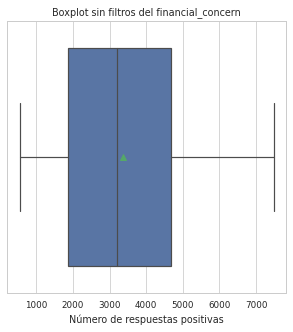

In [ ]:
# Hacemos el Boxplot sin filtro

sns.set(context='paper', style='whitegrid')
plt.figure(figsize=(5,5))
plt.title('Boxplot sin filtros del financial_concern')
sns.boxplot(x=df_1_financial_corcern['amount_of_positive_answers'],showmeans=True);
plt.xlabel('Número de respuestas positivas'); # Podemos ver que no hay datos atipicos por lo que no es posible filtrar por IQR

###### **Accept_vaccine**

In [ ]:
# Vamos a utilizar el df que ya habiamos filtrado, tomando de igual mananera el numero de respuestas positivas por día
df_2_accept_vaccine.head()

,region_where_applied,survey_date_short,indicator_percentage,sample_size,amount_of_positive_answers
0,Aguascalientes,2020-12,0.827023,9244,7645.000612
1,Aguascalientes,2020-12,0.820356,9623,7894.285788
2,Aguascalientes,2020-12,0.829659,9279,7698.405861
3,Aguascalientes,2020-12,0.845975,7633,6457.327175
4,Aguascalientes,2020-12,0.839036,7882,6613.281752


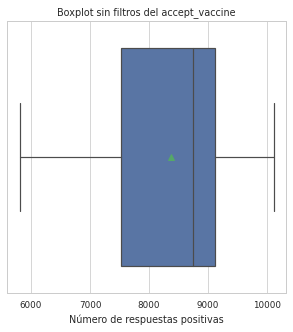

In [ ]:
# Hacemos el Boxplot sin filtro

sns.set(context='paper', style='whitegrid')
plt.figure(figsize=(5,5))
plt.title('Boxplot sin filtros del accept_vaccine')
sns.boxplot(x=df_2_accept_vaccine['amount_of_positive_answers'],showmeans=True);
plt.xlabel('Número de respuestas positivas'); # Podemos ver que no hay datos atipicos por lo que no es posible filtrar por IQR

###### **Barrier_side_effects**

In [ ]:
# Vamos a utilizar el df que ya habiamos filtrado, tomando de igual mananera el numero de respuestas positivas por día
df_3_barrier_side_effects.head()

,region_where_applied,survey_date_short,indicator_percentage,sample_size,amount_of_positive_answers
0,Aguascalientes,2021-2,0.573751,2551,1463.638801
1,Aguascalientes,2021-2,0.570975,2437,1391.466075
2,Aguascalientes,2021-2,0.555971,2560,1423.285760
3,Aguascalientes,2021-2,0.557596,2627,1464.804692
4,Aguascalientes,2021-2,0.600578,2656,1595.135168


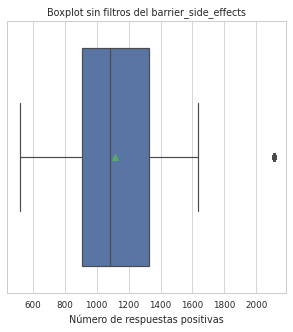

In [ ]:
sns.set(context='paper', style='whitegrid')
plt.figure(figsize=(5,5))
plt.title('Boxplot sin filtros del barrier_side_effects')
sns.boxplot(x=df_3_barrier_side_effects['amount_of_positive_answers'],showmeans=True);
plt.xlabel('Número de respuestas positivas'); # Aqui si hay datos atipico por lo que vamos a aplicar el filtro de IQR

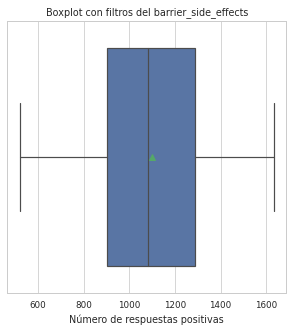

In [ ]:
# Boxplot con filtro

iqr_03=df_3_barrier_side_effects['amount_of_positive_answers'].quantile(0.75)-df_3_barrier_side_effects['amount_of_positive_answers'].quantile(0.25)
filtro_superior_03=df_3_barrier_side_effects['amount_of_positive_answers']<df_3_barrier_side_effects['amount_of_positive_answers'].quantile(.75)+(iqr_03*1.5)
filtro_inferior_03=df_3_barrier_side_effects['amount_of_positive_answers']>df_3_barrier_side_effects['amount_of_positive_answers'].quantile(.25)-(iqr_03*1.5)
df_3_barrier_side_effects_filtrado=df_3_barrier_side_effects[filtro_inferior_03 & filtro_superior_03]

sns.set(context='paper', style='whitegrid')
plt.figure(figsize=(5,5))
plt.title('Boxplot con filtros del barrier_side_effects')
sns.boxplot(x=df_3_barrier_side_effects_filtrado['amount_of_positive_answers'],showmeans=True);
plt.xlabel('Número de respuestas positivas'); 

###### **Trust_WHO_recommendation**

In [ ]:
# Lo primero que vamos a hacer es filtrar el df2 para obtener el amount_of_positive_answers
df_2_trust_WHO_recommendation=df2_columnas_sin_indexar.iloc[:,[0,2,9,10]]
amount_of_positive_answers=df_2_trust_WHO_recommendation.sample_size*df_2_trust_WHO_recommendation.indicator_percentage 
df_2_trust_WHO_recommendation.insert(4,'amount_of_positive_answers',amount_of_positive_answers)
df_2_trust_WHO_recommendation.head(2) #Insertamos una tercera columna para poder hacer todo el analisis sobre la misma

,region_where_applied,survey_date_short,indicator_percentage,sample_size,amount_of_positive_answers
0,Aguascalientes,2020-12,0.768438,3152,2422.116576
1,Aguascalientes,2020-12,0.753498,8364,6302.257272


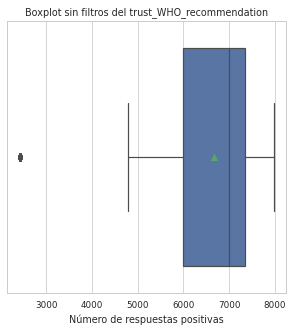

In [ ]:
# Utilizando este nuevo filtro procedemos a hacer el Boxplot
sns.set(context='paper', style='whitegrid')
plt.figure(figsize=(5,5))
plt.title('Boxplot sin filtros del trust_WHO_recommendation')
sns.boxplot(x=df_2_trust_WHO_recommendation['amount_of_positive_answers'],showmeans=True);
plt.xlabel('Número de respuestas positivas'); # Aqui si hay datos atipicos por lo que vamos a aplicar el filtro de IQR

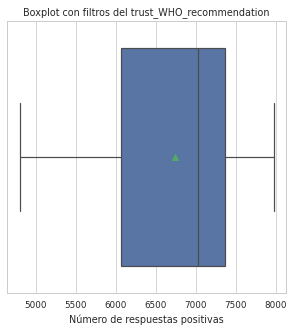

In [ ]:
# Boxplot con filtro

iqr_04=df_2_trust_WHO_recommendation['amount_of_positive_answers'].quantile(0.75)-df_2_trust_WHO_recommendation['amount_of_positive_answers'].quantile(0.25)
filtro_superior_04=df_2_trust_WHO_recommendation['amount_of_positive_answers']<df_2_trust_WHO_recommendation['amount_of_positive_answers'].quantile(.75)+(iqr_04*1.5)
filtro_inferior_04=df_2_trust_WHO_recommendation['amount_of_positive_answers']>df_2_trust_WHO_recommendation['amount_of_positive_answers'].quantile(.25)-(iqr_04*1.5)
df_2_trust_WHO_recommendation_filtrado=df_2_trust_WHO_recommendation[filtro_inferior_04 & filtro_superior_04]

sns.set(context='paper', style='whitegrid')
plt.figure(figsize=(5,5))
plt.title('Boxplot con filtros del trust_WHO_recommendation')
sns.boxplot(x=df_2_trust_WHO_recommendation_filtrado['amount_of_positive_answers'],showmeans=True);
plt.xlabel('Número de respuestas positivas'); #Aqui sí fue posible quitar los datos atipicos.

###### **Trust_government_recommendation**

In [ ]:
# Lo primero que vamos a hacer es filtrar el df2 para obtener el amount_of_positive_answers
df_2_trust_government_recommendation=df2_columnas_sin_indexar.iloc[:,[0,2,11,12]]
amount_of_positive_answers=df_2_trust_government_recommendation.sample_size*df_2_trust_government_recommendation.indicator_percentage 
df_2_trust_government_recommendation.insert(4,'amount_of_positive_answers',amount_of_positive_answers)
df_2_trust_government_recommendation.head(2) #Insertamos una tercera columna para poder hacer todo el analisis sobre la misma

,region_where_applied,survey_date_short,indicator_percentage,sample_size,amount_of_positive_answers
0,Aguascalientes,2020-12,0.657455,2942,1934.232610
1,Aguascalientes,2020-12,0.644496,7739,4987.754544


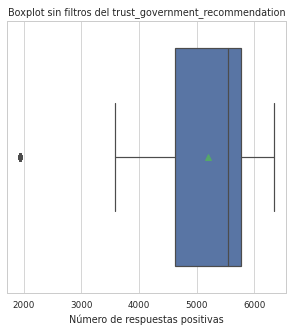

In [ ]:
sns.set(context='paper', style='whitegrid')
plt.figure(figsize=(5,5))
plt.title('Boxplot sin filtros del trust_government_recommendation')
sns.boxplot(x=df_2_trust_government_recommendation['amount_of_positive_answers'],showmeans=True);
plt.xlabel('Número de respuestas positivas'); # Aqui sí hay datos atipicos por lo que vamos a aplicar el filtro de IQR

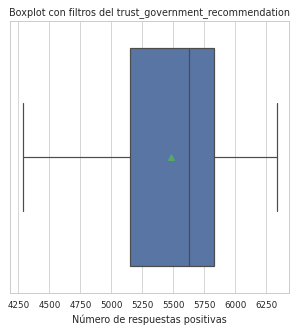

In [ ]:
# Boxplot con filtro

iqr_05=df_2_trust_government_recommendation['amount_of_positive_answers'].quantile(0.75)-df_2_trust_government_recommendation['amount_of_positive_answers'].quantile(0.25)
filtro_superior_05=df_2_trust_government_recommendation['amount_of_positive_answers']<df_2_trust_WHO_recommendation['amount_of_positive_answers'].quantile(.75)+(iqr_05*1.5)
filtro_inferior_05=df_2_trust_government_recommendation['amount_of_positive_answers']>df_2_trust_WHO_recommendation['amount_of_positive_answers'].quantile(.25)-(iqr_05*1.5)
df_2_trust_government_recommendation_filtrado=df_2_trust_government_recommendation[filtro_inferior_05 & filtro_superior_05]

sns.set(context='paper', style='whitegrid')
plt.figure(figsize=(5,5))
plt.title('Boxplot con filtros del trust_government_recommendation')
sns.boxplot(x=df_2_trust_government_recommendation_filtrado['amount_of_positive_answers'],showmeans=True);
plt.xlabel('Número de respuestas positivas'); #Aqui sí fue posible quitar los datos atipicos.

###### **Conclusiones**

- Lo primero y más evidente es que las personas en nuestros país confian más en las recomendaciones de la OMS que en las de muestros propio gobierno.
- Lo siguiente es que hay una cantidad considerable de personas que estan en contra de la vacuna por sus efectos efectos efectos, por lo que se debe atacar ese rubro para conseguir que más personas se puedan vacunar.
- Algo positivo es que existen una gran aceptación de la vacuna.
- Por último tenemos que de manera extraña, una cantidad no tan grande de personas se encuentra preocupada por sus finanzas, tomando en cuenta que 2020 ha sido el peor añor año economicamente en toda la historio de México.

##### **2. Generación de tablas de frecuencia**

###### **Financial_concern**

In [ ]:
# Lo primero que debemos obtener es el numero de filas que tiene
num_filas_df_1_financial_corcern=len(df_1_financial_corcern['amount_of_positive_answers'])

# Luego debemos sacar el k que es el numero de dividisiones que debe tener la tabla de frecuencias
# En estadistica la formula más aceptada para obtener esto es log_2(n)
# Donde n es el numero de datos con los que se cuenta por obtenemos las filas

k_df_1_financial_corcern=math.ceil(math.log2(num_filas_df_1_financial_corcern))


# Ahora solo queda sustituirlo en función de pandas

amount_of_positive_answers=df_1_financial_corcern['amount_of_positive_answers']
segmento_df_1_financial_corcern=pd.cut(amount_of_positive_answers,k_df_1_financial_corcern)
amount_of_positive_answers.groupby(segmento_df_1_financial_corcern).count()

amount_of_positive_answers
(545.759, 1085.254]      137
(1085.254, 1617.826]    1133
(1617.826, 2150.398]     999
(2150.398, 2682.97]      676
(2682.97, 3215.542]      653
(3215.542, 3748.114]     712
(3748.114, 4280.686]     283
(4280.686, 4813.258]     852
(4813.258, 5345.829]     442
(5345.829, 5878.401]     667
(5878.401, 6410.973]     480
(6410.973, 6943.545]       0
(6943.545, 7476.117]      31
Name: amount_of_positive_answers, dtype: int64

###### **Accept_vaccine**

In [ ]:
# Lo primero que debemos obtener es el numero de filas que tiene
num_filas_df_2_accept_vaccine=len(df_2_accept_vaccine['amount_of_positive_answers'])

# Luego debemos sacar el k que es el numero de dividisiones que debe tener la tabla de frecuencias
# En estadistica la formula más aceptada para obtener esto es log_2(n)
# Donde es el numero de datos con los que se cuenta por obtenemos las filas

k_df_2_accept_vaccine=math.ceil(math.log2(num_filas_df_2_accept_vaccine))


# Ahora solo queda sustituirlo en función de pandas
amount_of_positive_answers_02=df_2_accept_vaccine['amount_of_positive_answers']
segmento_df_2_accept_vaccine=pd.cut(amount_of_positive_answers_02,k_df_2_accept_vaccine)
amount_of_positive_answers_02.groupby(segmento_df_2_accept_vaccine).count()

amount_of_positive_answers
(5808.255, 6203.103]      26
(6203.103, 6593.655]      26
(6593.655, 6984.207]      79
(6984.207, 7374.759]     215
(7374.759, 7765.312]     169
(7765.312, 8155.864]      58
(8155.864, 8546.416]     144
(8546.416, 8936.968]     323
(8936.968, 9327.52]      299
(9327.52, 9718.072]      211
(9718.072, 10108.625]     31
Name: amount_of_positive_answers, dtype: int64

###### **Barrier_side_effects**

In [ ]:
# Lo primero que debemos obtener es el numero de filas que tiene
num_filas_df_3_barrier_side_effects=len(df_3_barrier_side_effects['amount_of_positive_answers'])

# Luego debemos sacar el k que es el numero de dividisiones que debe tener la tabla de frecuencias
# En estadistica la formula más aceptada para obtener esto es log_2(n)
# Donde es el numero de datos con los que se cuenta por obtenemos las filas

k_df_3_barrier_side_effects=math.ceil(math.log2(num_filas_df_3_barrier_side_effects))


# Ahora solo queda sustituirlo en función de pandas
amount_of_positive_answers_03=df_3_barrier_side_effects['amount_of_positive_answers']
segmento_df_3_barrier_side_effects=pd.cut(amount_of_positive_answers_03,k_df_3_barrier_side_effects)
amount_of_positive_answers_03.groupby(segmento_df_3_barrier_side_effects).count()

amount_of_positive_answers
(518.416, 664.282]       82
(664.282, 808.561]      132
(808.561, 952.84]       346
(952.84, 1097.119]      435
(1097.119, 1241.398]    301
(1241.398, 1385.677]    207
(1385.677, 1529.956]    266
(1529.956, 1674.235]     80
(1674.235, 1818.514]      0
(1818.514, 1962.793]      0
(1962.793, 2107.072]     31
Name: amount_of_positive_answers, dtype: int64

###### **Trust_WHO_recommendation**

In [ ]:
# Lo primero que debemos obtener es el numero de filas que tiene
num_filas_df_2_trust_WHO_recommendation_filtrado=len(df_2_trust_WHO_recommendation_filtrado['amount_of_positive_answers'])

# Luego debemos sacar el k que es el numero de dividisiones que debe tener la tabla de frecuencias
# En estadistica la formula más aceptada para obtener esto es log_2(n)
# Donde es el numero de datos con los que se cuenta por obtenemos las filas

k_df_2_trust_WHO_recommendation_filtrado=math.ceil(math.log2(num_filas_df_2_trust_WHO_recommendation_filtrado))


# Ahora solo queda sustituirlo en función de pandas
amount_of_positive_answers_04=df_2_trust_WHO_recommendation_filtrado['amount_of_positive_answers']
segmento_df_2_trust_WHO_recommendation_filtrado=pd.cut(amount_of_positive_answers_04,k_df_2_trust_WHO_recommendation_filtrado)
amount_of_positive_answers_04.groupby(segmento_df_2_trust_WHO_recommendation_filtrado).count()

# Es importante mencionar que aqui los filtros fueron efectivos por lo que trabajamos con datos filtrados

amount_of_positive_answers
(4795.136, 5087.053]     26
(5087.053, 5375.794]     53
(5375.794, 5664.534]    161
(5664.534, 5953.275]    106
(5953.275, 6242.016]     83
(6242.016, 6530.756]    115
(6530.756, 6819.497]    174
(6819.497, 7108.238]    174
(7108.238, 7396.979]    299
(7396.979, 7685.719]    239
(7685.719, 7974.46]     122
Name: amount_of_positive_answers, dtype: int64

###### **Trust_government_recommendation**

In [ ]:
# Lo primero que debemos obtener es el numero de filas que tiene
num_filas_df_2_trust_government_recommendation_filtrado=len(df_2_trust_government_recommendation_filtrado['amount_of_positive_answers'])

# Luego debemos sacar el k que es el numero de dividisiones que debe tener la tabla de frecuencias
# En estadistica la formula más aceptada para obtener esto es log_2(n)
# Donde es el numero de datos con los que se cuenta por obtenemos las filas

k_df_2_trust_government_recommendation_filtrado=math.ceil(math.log2(num_filas_df_2_trust_government_recommendation_filtrado))


# Ahora solo queda sustituirlo en función de pandas
amount_of_positive_answers_05=df_2_trust_government_recommendation_filtrado['amount_of_positive_answers']
segmento_df_2_trust_government_recommendation_filtrado=pd.cut(amount_of_positive_answers_05,k_df_2_trust_government_recommendation_filtrado)
amount_of_positive_answers_05.groupby(segmento_df_2_trust_government_recommendation_filtrado).count()

amount_of_positive_answers
(4285.709, 4473.69]      54
(4473.69, 4659.626]      80
(4659.626, 4845.562]     83
(4845.562, 5031.497]     88
(5031.497, 5217.433]     58
(5217.433, 5403.368]     57
(5403.368, 5589.304]    177
(5589.304, 5775.24]     354
(5775.24, 5961.175]     151
(5961.175, 6147.111]    180
(6147.111, 6333.046]     30
Name: amount_of_positive_answers, dtype: int64

##### **3. Generación de histogramas**

###### **Trust_WHO_recommendation**

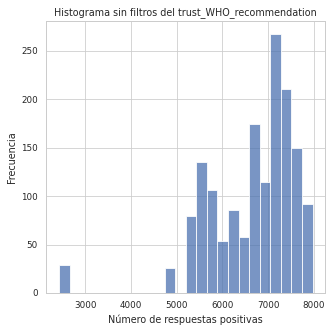

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Histograma sin filtros del trust_WHO_recommendation')
sns.histplot(data=df_2_trust_WHO_recommendation, x='amount_of_positive_answers');
plt.xlabel('Número de respuestas positivas')
plt.ylabel('Frecuencia'); # Es evidente ver los datos atipicos, por lo que vamos a hacer otro sin los mismos.

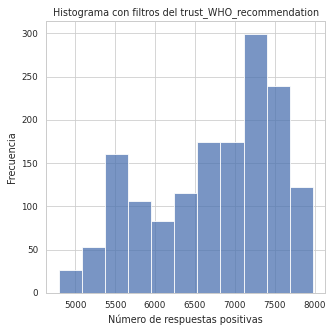

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Histograma con filtros del trust_WHO_recommendation')
sns.histplot(data=df_2_trust_WHO_recommendation_filtrado, x='amount_of_positive_answers', bins=11);
plt.xlabel('Número de respuestas positivas')
plt.ylabel('Frecuencia'); #Aqui podemos ver mejor el histograma

###### **Trust_government_recommendation**

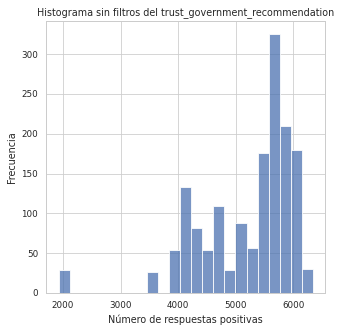

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Histograma sin filtros del trust_government_recommendation')
sns.histplot(data=df_2_trust_government_recommendation, x='amount_of_positive_answers');
plt.xlabel('Número de respuestas positivas')
plt.ylabel('Frecuencia'); # Es evidente ver los datos atipicos, por lo que vamos a hacer otro sin los mismos.

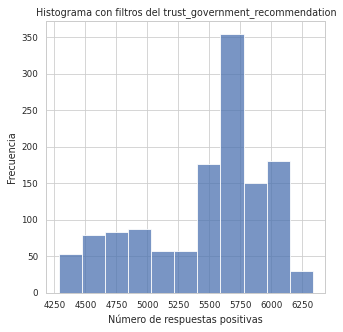

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Histograma con filtros del trust_government_recommendation')
sns.histplot(data=df_2_trust_government_recommendation_filtrado, x='amount_of_positive_answers', bins=11);
plt.xlabel('Número de respuestas positivas')
plt.ylabel('Frecuencia'); #Aqui podemos ver mejor el histograma

##### **4. Generación de gráficas de densidad**

###### **Financial_concern**

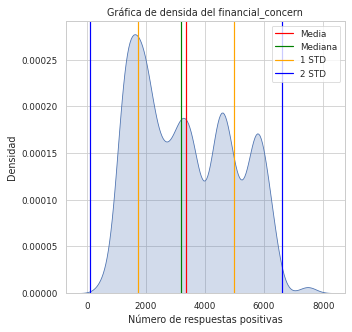

In [ ]:
# Configuramos la gráfica de densidad
plt.figure(figsize=(5,5))
plt.title('Gráfica de densida del financial_concern')
sns.kdeplot(x=df_1_financial_corcern['amount_of_positive_answers'],fill=True);
plt.xlabel('Número de respuestas positivas')
plt.ylabel('Densidad');
plt.axvline(x=media, color='red', label='Media');
plt.axvline(x=mediana, color='green', label='Mediana');
plt.axvline(x=media+std_fc, color = 'orange', label='1 STD');
plt.axvline(x=media-std_fc, color = 'orange')
plt.axvline(x=media+(2*std_fc), color = 'blue', label='2 STD');
plt.axvline(x=media-(2*std_fc), color = 'blue')
plt.legend(); 

In [ ]:
# Le agregamos el skew y la kurtosis
print(f"Kurtosis: {kurtosis(df_1_financial_corcern['amount_of_positive_answers'])}")
print(f"Asimetria: {skew(df_1_financial_corcern['amount_of_positive_answers'])}")

Kurtosis: -1.1521311071662361
Asimetria: 0.2766236511461239


###### **Accept_vaccine**

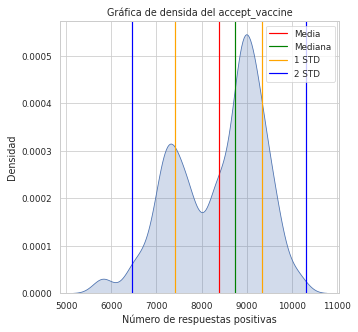

In [ ]:
# Configuramos la gráfica de densidad
plt.figure(figsize=(5,5))
plt.title('Gráfica de densida del accept_vaccine')
sns.kdeplot(x=df_2_accept_vaccine['amount_of_positive_answers'],fill=True);
plt.xlabel('Número de respuestas positivas')
plt.ylabel('Densidad');
plt.axvline(x=media_02, color='red', label='Media');
plt.axvline(x=mediana_02, color='green', label='Mediana');
plt.axvline(x=media_02+std_02, color = 'orange', label='1 STD');
plt.axvline(x=media_02-std_02, color = 'orange')
plt.axvline(x=media_02+(2*std_02), color = 'blue', label='2 STD');
plt.axvline(x=media_02-(2*std_02), color = 'blue')
plt.legend(); 

In [ ]:
print(f"Kurtosis: {kurtosis(df_2_accept_vaccine['amount_of_positive_answers'])}")
print(f"Asimetria: {skew(df_2_accept_vaccine['amount_of_positive_answers'])}")

Kurtosis: -0.6300303130389606
Asimetria: -0.5008690511068308


###### **Barrier_side_effects**

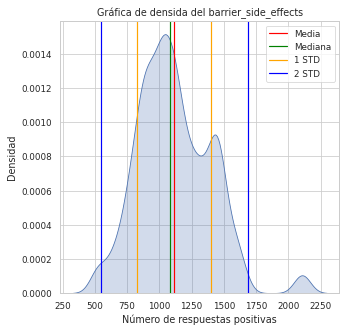

In [ ]:
# Configuramos la gráfica de densidad
plt.figure(figsize=(5,5))
plt.title('Gráfica de densida del barrier_side_effects')
sns.kdeplot(x=df_3_barrier_side_effects['amount_of_positive_answers'],fill=True);
plt.xlabel('Número de respuestas positivas')
plt.ylabel('Densidad');
plt.axvline(x=media_03, color='red', label='Media');
plt.axvline(x=mediana_03, color='green', label='Mediana');
plt.axvline(x=media_03+std_03, color = 'orange', label='1 STD');
plt.axvline(x=media_03-std_03, color = 'orange')
plt.axvline(x=media_03+(2*std_03), color = 'blue', label='2 STD');
plt.axvline(x=media_03-(2*std_03), color = 'blue')
plt.legend(); 

In [ ]:
print(f"Kurtosis: {kurtosis(df_3_barrier_side_effects['amount_of_positive_answers'])}")
print(f"Asimetria: {skew(df_3_barrier_side_effects['amount_of_positive_answers'])}")

Kurtosis: 0.9295041043783878
Asimetria: 0.6192526454122463


#### _**Sesión 3:** Exploración de variables categóricas y análisis multivariable_

1. **Convierte la variable numérica `covid_19 (df1)` en una variable categórica de 4 categorías, donde los valores de 0 a 0.0125 pasen a ser la categoría `Low`, los de 0.0125 a 0.025 la categoría `Normal`, los de 0.025 a 0.0375 la categoría `High` y los de 0.0375 en adelante la categoría `Very high`. Nombra la nueva columna como `contagion_rate` y elimina la columna llamada `covid_19`. Sin embargo, ten en cuenta que debes guardar los cambios en una variable distinta para conservar el _dataframe_ original.**

2. **Nota que nuestras variables categórica son: `covid_19 (df1)`, `survey_date_short (df1)` y `region_where_applied (df1)`.**

3. **Genera gráficas de barras con las variables categóricas `covid_19 (df1)`, `survey_date_short (df1)` y `region_where_applied (df1)`. Personaliza el estilo de las gráficas y nombra apropiadamente los títulos y los ejes.**

4. **Genera una tabla de contingencia que incluya las tres variables categóricas antes mencionadas; las columnas deben ser las fechas cortas, mientras que los índices serán los nombres de los estados y las categorías de la variable `covid_19 (df1)` (nota que es una sola tabla con multi-índices en las filas, donde el índice principal es el nombre de cada estado).**

5. **Genera `Boxplots` y `Violinplots` combinando la variable numérica `accept_vaccine (df2)` con la variable categórica `region_where_applied (df2)`. Para evitar tener muchos gráficos en un solo plano cartesiano, considera incluir, a lo sumo, cuatro `plots` por plano. Nota que son 32 estados; puedes hacer 16 `Boxplots` y 16 `Violinplopts`.**

##### **1. Creación de la variable categorica covid_19**

In [ ]:
# Lo primero que debemos hacer es un filtro con las variables que vamos a utilizar

df_1_covid_19=df1_columnas_sin_indexar.iloc[:,[0,2,3,4]]
amount_of_positive_answers=df_1_covid_19.sample_size*df_1_covid_19.indicator_percentage 
df_1_covid_19.insert(4,'amount_of_positive_answers',amount_of_positive_answers)
df_1_covid_19.head(2)

,region_where_applied,survey_date_short,indicator_percentage,sample_size,amount_of_positive_answers
0,Aguascalientes,2020-11,0.023153,8453,195.712309
1,Aguascalientes,2020-11,0.020100,9490,190.749000


In [ ]:
# Creamos los valores para el filtro para convetir a covid_19 en una variable categorica

valores=[0,0.0125,0.025,0.375,math.inf]
categorias=['Low','Normal','High','Very high']
contagion_rate=pd.cut(x=df_1_covid_19['indicator_percentage'],bins=valores,labels=categorias)
df_1_covid_19_02=df_1_covid_19.copy()
df_1_covid_19_02.insert(4,'contagion_rate',contagion_rate)

In [ ]:
df_1_covid_19_02.head(2)

,region_where_applied,survey_date_short,indicator_percentage,sample_size,contagion_rate,amount_of_positive_answers
0,Aguascalientes,2020-11,0.023153,8453,Normal,195.712309
1,Aguascalientes,2020-11,0.020100,9490,Normal,190.749000


In [ ]:
# Por último eliminamos la columna de indicator_percentage que es de covid_19
df_1_covid_19_categorico=df_1_covid_19_02.copy()
del(df_1_covid_19_categorico['indicator_percentage'])
df_1_covid_19_categorico.head(10) #Así quedo lista la variable categorica

,region_where_applied,survey_date_short,sample_size,contagion_rate,amount_of_positive_answers
0,Aguascalientes,2020-11,8453,Normal,195.712309
1,Aguascalientes,2020-11,9490,Normal,190.749000
2,Aguascalientes,2020-11,9540,High,238.977000
3,Aguascalientes,2020-11,9315,High,241.780140
4,Aguascalientes,2020-11,9430,Normal,209.874080
5,Aguascalientes,2020-11,9408,Normal,203.692608
6,Aguascalientes,2020-11,9584,Normal,220.547008
7,Aguascalientes,2020-11,9851,Normal,220.297913
8,Aguascalientes,2020-12,9948,Normal,237.816888
9,Aguascalientes,2020-12,9954,Normal,248.730552


##### **2. Creación de las variables categoricas region_where_applied y survey_date_short**

###### **Region_where_applied**

In [ ]:
#Solo debemos aplicar la función astype
df_1_covid_19_categorico['region_where_applied'].astype('category')

0       Aguascalientes
1       Aguascalientes
2       Aguascalientes
3       Aguascalientes
4       Aguascalientes
             ...      
7060         Zacatecas
7061         Zacatecas
7062         Zacatecas
7063         Zacatecas
7064         Zacatecas
Name: region_where_applied, Length: 7065, dtype: category
Categories (32, object): ['Aguascalientes', 'Baja California', 'Baja California Sur', 'Campeche', ...,
                          'Tlaxcala', 'Veracruz', 'Yucatán', 'Zacatecas']

###### **Survey_date_short**

In [ ]:
#Solo debemos aplicar la función astype
df_1_covid_19_categorico['survey_date_short'].astype('category')

0       2020-11
1       2020-11
2       2020-11
3       2020-11
4       2020-11
         ...   
7060     2021-2
7061     2021-5
7062     2021-8
7063     2021-8
7064     2021-8
Name: survey_date_short, Length: 7065, dtype: category
Categories (11, object): ['2020-11', '2020-12', '2021-1', '2021-2', ..., '2021-6', '2021-7', '2021-8',
                          '2021-9']

##### **3. Creación de las gráficas de barra**

###### **Covid_19**

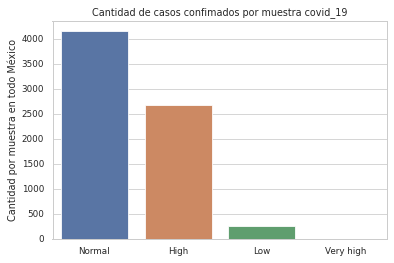

In [ ]:
# Primero hacemos el conteo de cada actegoria
counts_covid_19=df_1_covid_19_categorico['contagion_rate'].value_counts()

# Luego configuramos la gráfica de barra
ax= sns.barplot(x=counts_covid_19.index,y=counts_covid_19, order=counts_covid_19.index)
ax.set_title('Cantidad de casos confimados por muestra covid_19')
ax.set(ylabel='Cantidad por muestra en todo México');

###### **Region_where_applied**

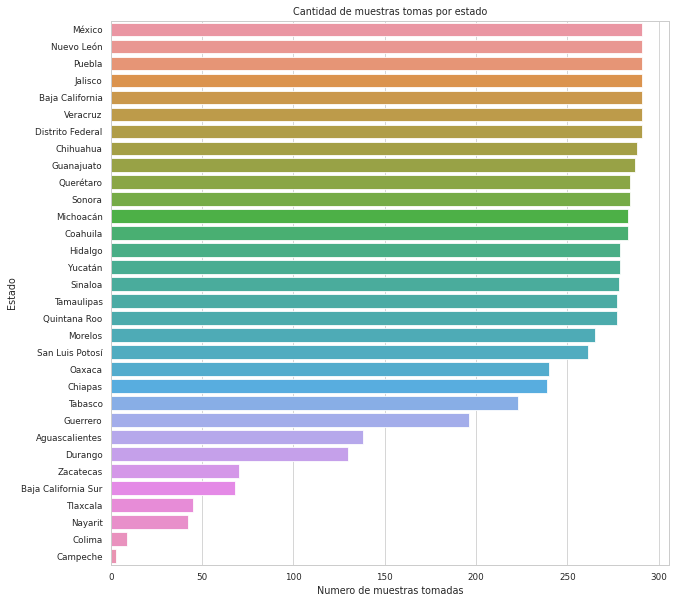

In [ ]:
# Primero hacemos el conteo de cada actegoria
counts_region_where_applied=df_1_covid_19_categorico['region_where_applied'].value_counts()

# Luego configuramos la gráfica de barra
plt.figure(figsize=(10,10))
ax= sns.barplot(y=counts_region_where_applied.index,x=counts_region_where_applied, order=counts_region_where_applied.index)
ax.set_title('Cantidad de muestras tomas por estado');
ax.set(ylabel='Estado', xlabel='Numero de muestras tomadas');

###### **Survey_date_short**

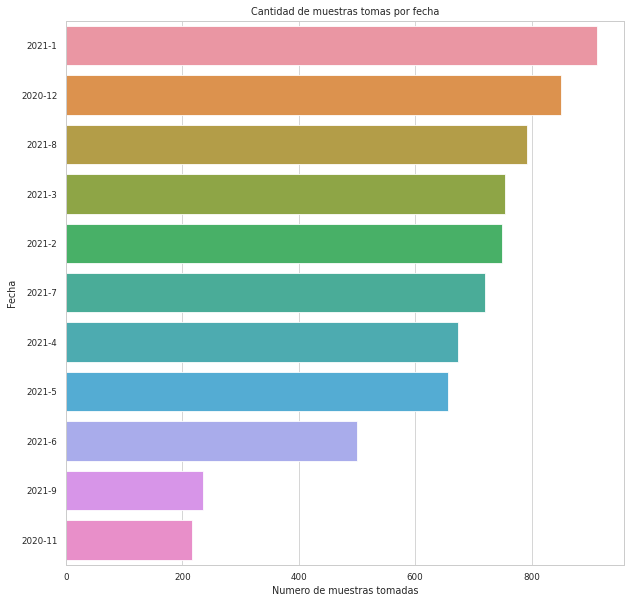

In [ ]:
# Primero hacemos el conteo de cada actegoria
counts_survey_date_short=df_1_covid_19_categorico['survey_date_short'].value_counts()

# Luego configuramos la gráfica de barra
plt.figure(figsize=(10,10))
ax= sns.barplot(y=counts_survey_date_short.index,x=counts_survey_date_short, order=counts_survey_date_short.index)
ax.set_title('Cantidad de muestras tomas por fecha');
ax.set(ylabel='Fecha', xlabel='Numero de muestras tomadas');

##### **4. Creación de la tabla de contingencia**

In [ ]:
# Lo que debemos hacer es una tabla de contingencia multivariable que podemos hacer con crosstab
# Vamos a sustituir los NaN con ceros


crosstab=pd.crosstab(df_1_covid_19_categorico['region_where_applied'], [df_1_covid_19_categorico['contagion_rate'],df_1_covid_19_categorico['survey_date_short']])
crosstab=crosstab.stack(0)
crosstab=crosstab.fillna(0)
crosstab

survey_date_short                    2020-11  2020-12  ...  2021-8  2021-9
region_where_applied contagion_rate                    ...                
Aguascalientes       Low                 0.0      0.0  ...     0.0     0.0
                     Normal              6.0     24.0  ...     0.0     0.0
                     High                2.0      7.0  ...    14.0     0.0
Baja California      Low                 0.0      0.0  ...     0.0     0.0
                     Normal              6.0     24.0  ...     0.0     0.0
...                                      ...      ...  ...     ...     ...
Yucatán              Normal              6.0     22.0  ...     0.0     0.0
                     High                2.0      7.0  ...    30.0    10.0
Zacatecas            Low                 0.0      0.0  ...     0.0     0.0
                     Normal              6.0     22.0  ...     0.0     0.0
                     High                2.0      6.0  ...     3.0     0.0

[96 rows x 11 columns]

##### **5. Generación de Boxplots y Violinplots**

###### **Boxplot**

In [ ]:
# Lo primero que vamos a hacer es convertir la variable region_where_applied del df_2_accept_vaccine

df_2_accept_vaccine['region_where_applied'].astype('category')

0       Aguascalientes
1       Aguascalientes
2       Aguascalientes
3       Aguascalientes
4       Aguascalientes
             ...      
1576         Zacatecas
1577         Zacatecas
1578         Zacatecas
1579         Zacatecas
1580         Zacatecas
Name: region_where_applied, Length: 1581, dtype: category
Categories (32, object): ['Aguascalientes', 'Baja California', 'Baja California Sur', 'Campeche', ...,
                          'Tlaxcala', 'Veracruz', 'Yucatán', 'Zacatecas']

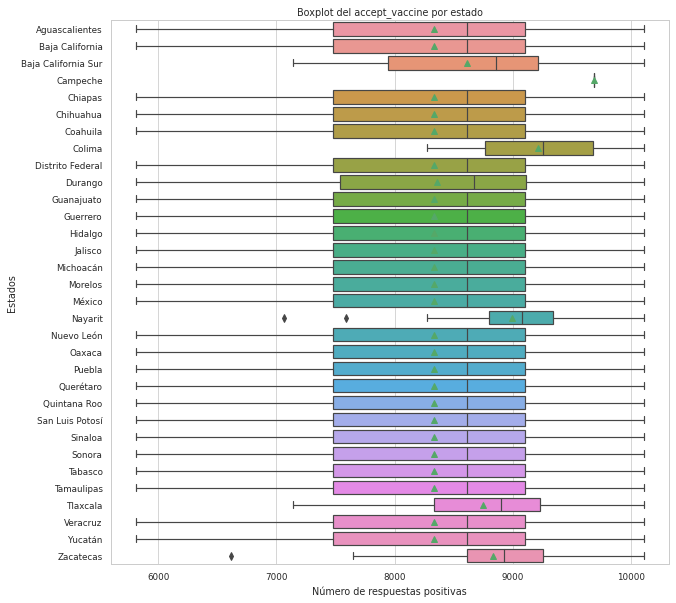

In [ ]:
# Creamos el Boxplot

sns.set(context='paper', style='whitegrid')
plt.figure(figsize=(10,10))
plt.title('Boxplot del accept_vaccine por estado')
sns.boxplot(x=df_2_accept_vaccine['amount_of_positive_answers'],y=df_2_accept_vaccine['region_where_applied'],showmeans=True);
plt.xlabel('Número de respuestas positivas');
plt.ylabel('Estados'); #Algo importante a resaltar aqui es que de ,manera general no parece haber datos atipicos pero de manera particular sí podemos verlos


###### **Violinplots**

<Figure size 2160x2160 with 0 Axes>

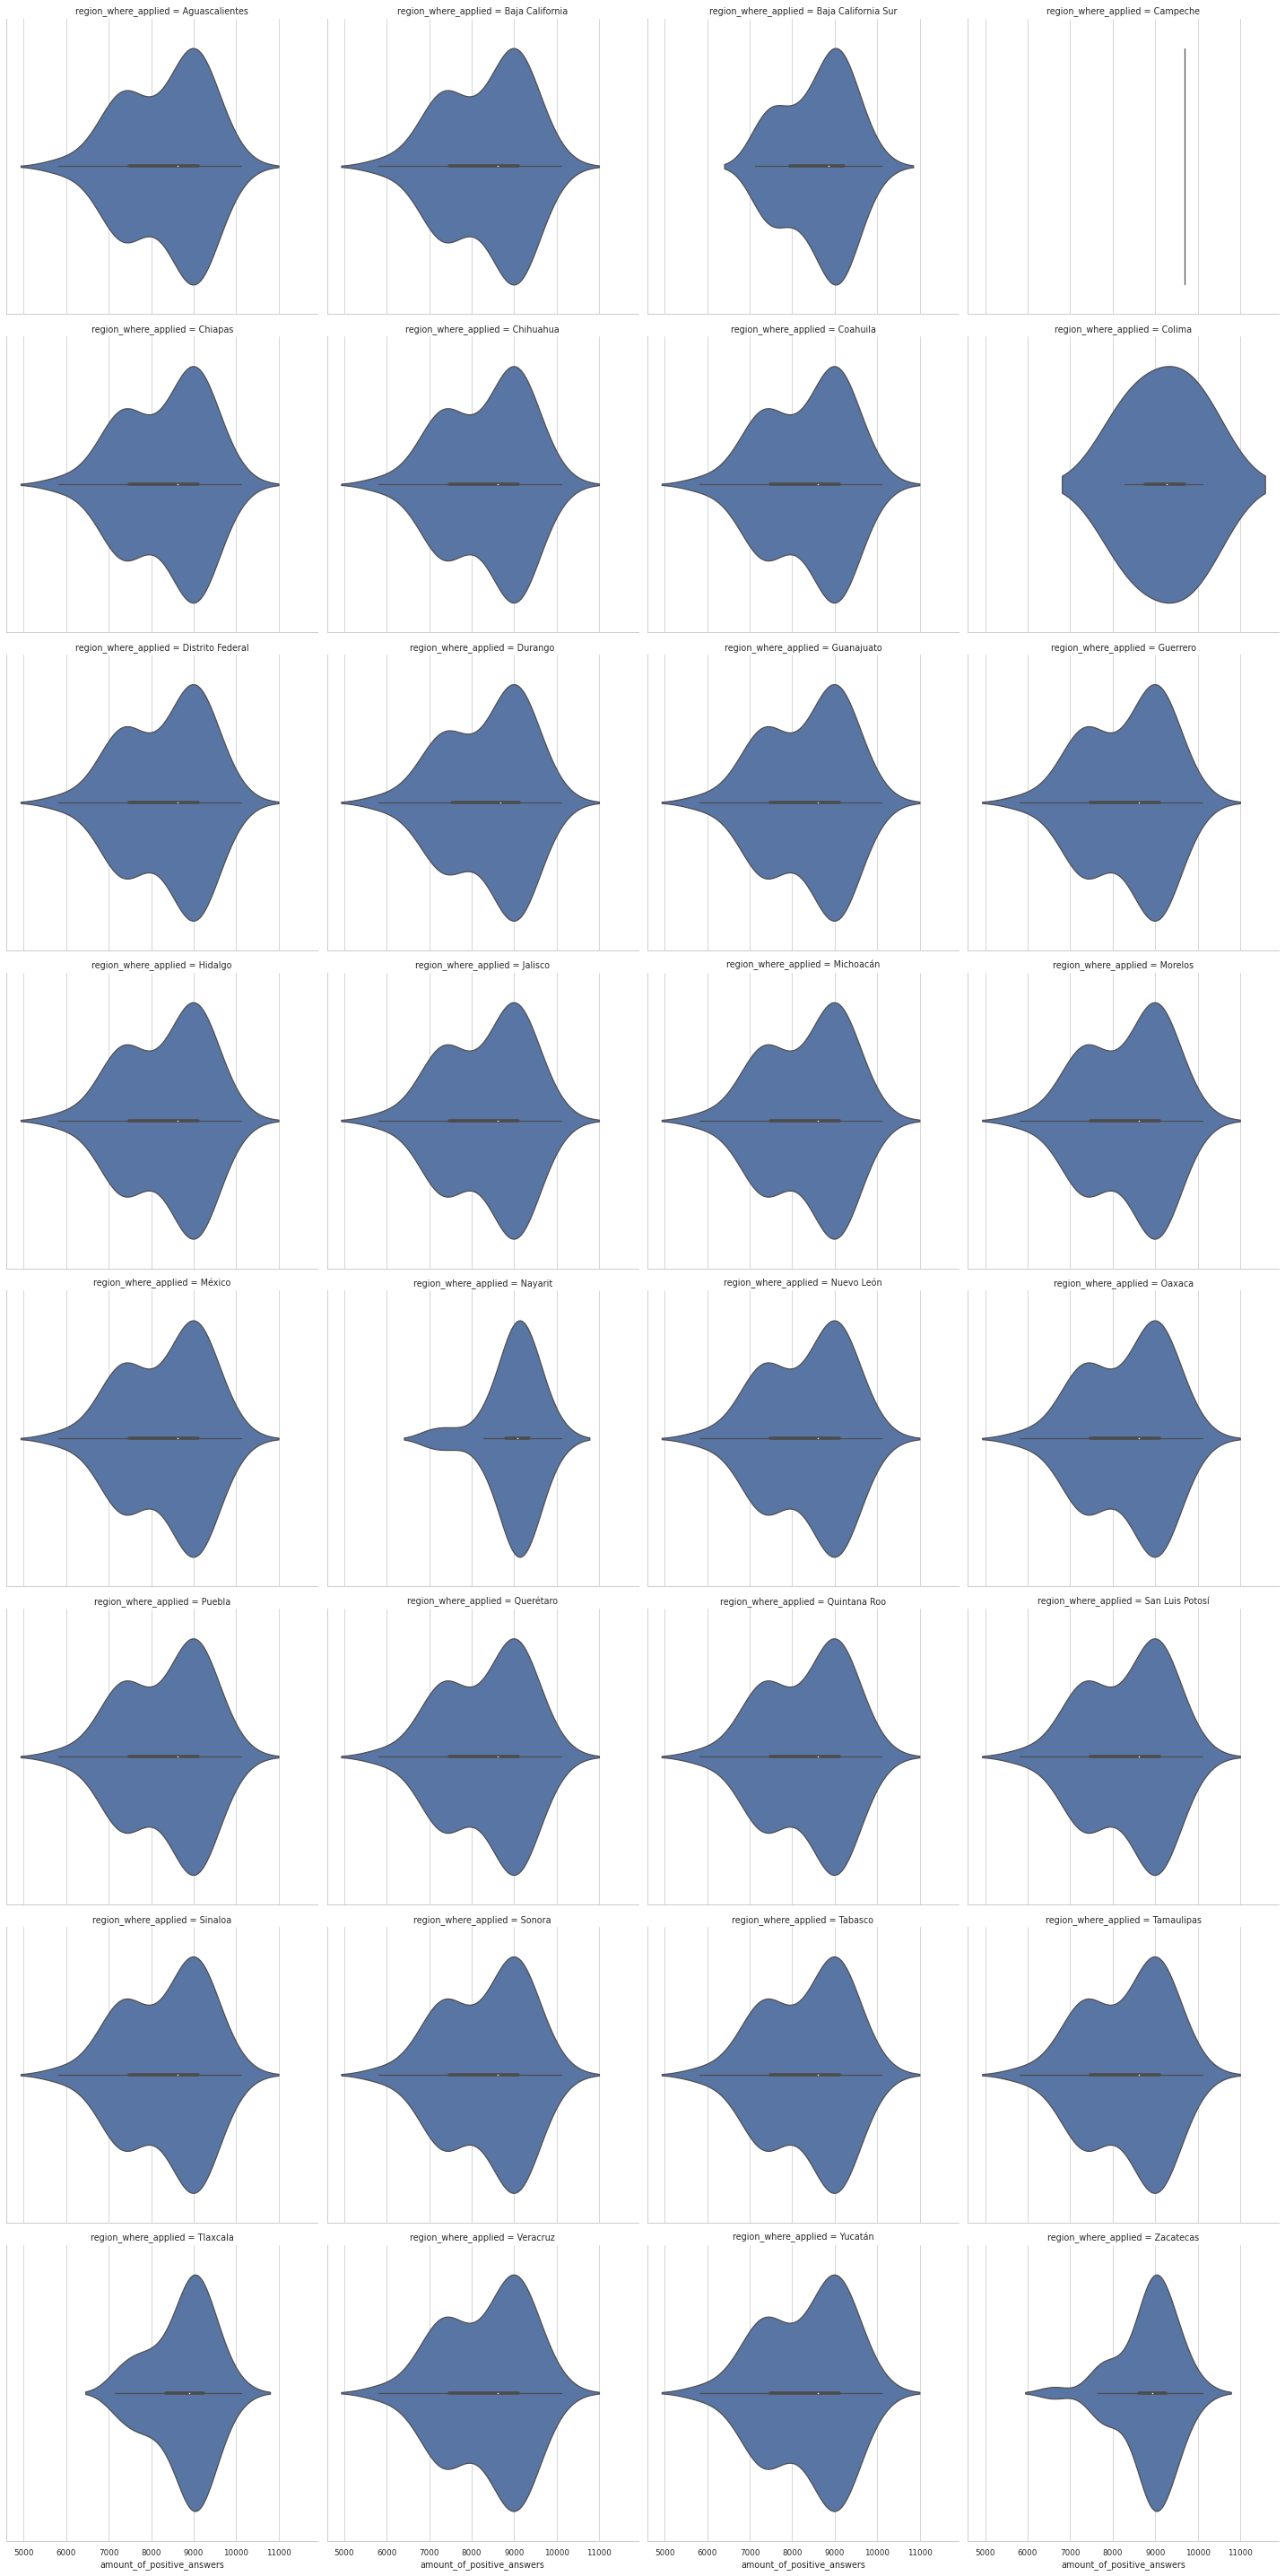

In [ ]:
plt.figure(figsize=(30,30));
sns.catplot(col='region_where_applied',
            x='amount_of_positive_answers',
            col_wrap=4, 
            kind='violin',
            data=df_2_accept_vaccine[df_2_accept_vaccine.region_where_applied.notnull()],);

#### _**Sesión 4:** Correlaciones y Regresión linear simple_

1. **Genera una tabla de correlaciones utilizando la función `croostab`. Hazlo con cada uno de los _dataframes_ globales que ya conoces.**
2. **Genera mapas de calor para cada una de las tablas anteriores. Personaliza el estilo y asígnales nombres apropiados.**
**Recuerda que en este punto del desarrollo, los _dataframes_ ya tienen que estar perfectamente limpios y los nombres de las columnas deben ser los adecuados.**
3. **Genera un `Pairplot` del tercer _dataframe_ dejando fuera las variables `partially_vaccinated` y `fully_vaccinated`.**
4. **Repite el primer punto de la Sesión 2, pero utilizando `scatterplots` en vez de `boxplots`. Haz una comparación y anota tus observaciones.**
5. **Aplica un modelo de regresión lineal simple para las variables `covid_19` (nota que este indicador está en el _dataframe_ que no contiene a la variable catergórica `contagion_rate` ni a las columnas `sample_size`) y `wear_a_mask`.**
6. **Aplica un modelo de regresión lineal multivariable con las variables `trust_healthcare_recommendation`, `trust_government_recommendation`, `trust_family_recommendation` y `accept_vaccine` (siendo esta última la variable independiente).**

##### **1. Generación de tablas de correlación**

###### **Df1**

In [ ]:
# Lo primero que debemos hacer es limipiar el df_1 para obtener solo las columnas de indicator_percentage y ponerle los nombres adecuados
df_1_only_indicator_percentage=df1_columnas_sin_indexar.iloc[:,[3,5,7]]
df_1_only_indicator_percentage.columns=['covid_19','wear_a_mask','financial_concern']
df_1_only_indicator_percentage.head(2)

,covid_19,wear_a_mask,financial_concern
0,0.023153,0.899553,0.630136
1,0.020100,0.901764,0.619214


In [ ]:
# Ahora sí podemos proceder a hacer la tabla de correlación
df_1_only_indicator_percentage.corr()

,covid_19,wear_a_mask,financial_concern
covid_19,1.000000,-0.694354,-0.057203
wear_a_mask,-0.694354,1.000000,0.344602
financial_concern,-0.057203,0.344602,1.000000


###### **Df2**

In [ ]:
# Lo primero que debemos hacer es limipiar el df_2 para obtener solo las columnas de indicator_percentage y ponerle los nombres adecuados
df_2_only_indicator_percentage=df2_columnas_sin_indexar.iloc[:,[3,5,7,9,11]]
df_2_only_indicator_percentage.columns=['accept_vaccine','trust_family_recommendation','trust_healthcare_recommendation','trust_WHO_recommendation','trust_government_recommendation']
df_2_only_indicator_percentage.head(2)

,accept_vaccine,trust_family_recommendation,trust_healthcare_recommendation,trust_WHO_recommendation,trust_government_recommendation
0,0.827023,0.644872,0.721161,0.768438,0.657455
1,0.820356,0.653233,0.705194,0.753498,0.644496


In [ ]:
# Ahora sí podemos proceder a hacer la tabla de correlación
df_2_only_indicator_percentage.corr()

,accept_vaccine,trust_family_recommendation,trust_healthcare_recommendation,trust_WHO_recommendation,trust_government_recommendation
accept_vaccine,1.000000,-0.871745,-0.709677,0.639071,-0.530406
trust_family_recommendation,-0.871745,1.000000,0.897975,-0.507564,0.757195
trust_healthcare_recommendation,-0.709677,0.897975,1.000000,-0.375193,0.797321
trust_WHO_recommendation,0.639071,-0.507564,-0.375193,1.000000,0.057234
trust_government_recommendation,-0.530406,0.757195,0.797321,0.057234,1.000000


###### **Df3**

In [ ]:
 # Aqui tenemos que aplicar más filtros ya que aún no tenemos un df3_con_columnas_sin_indexar
 df3.head(2) #Revisamos de manera inicial el df

survey_information              ... barrier_dont_trust_government            
  region_where_applied survey_date  ...          indicator_percentage sample_size
0       Aguascalientes  2021-02-06  ...                           0.0        2551
1       Aguascalientes  2021-02-07  ...                           0.0        2437

[2 rows x 19 columns]

In [ ]:
# Creamos un df3_con_columnas_sin_indexar 
df3_columnas_sin_indexar=df3.copy() 
df3_columnas_sin_indexar.columns=df3_columnas_sin_indexar.columns.droplevel(0)
df3_columnas_sin_indexar.head(2) 

,region_where_applied,survey_date,survey_date_short,indicator_percentage,sample_size,indicator_percentage,sample_size,indicator_percentage,sample_size,indicator_percentage,sample_size,indicator_percentage,sample_size,indicator_percentage,sample_size,indicator_percentage,sample_size,indicator_percentage,sample_size
0,Aguascalientes,2021-02-06,2021-2,0.018895,8164,0.123849,196,0.573751,2551,0.139143,116,0.244192,116,0.050306,2551,0.054113,2551,0.0,2551
1,Aguascalientes,2021-02-07,2021-2,0.022152,8249,0.154368,202,0.570975,2437,0.205662,106,0.132152,106,0.049256,2437,0.067466,2437,0.0,2437


In [ ]:
# Aplicamos el último filtro
df_3_only_indicator_percentage=df3_columnas_sin_indexar.iloc[:,[3,5,7,9,11,13,15,17]]
df_3_only_indicator_percentage.columns=['partially_vaccinated','fully_vaccinated','barrier_side_effects','barrier_dont_need_already_had','barrier_dont_need_not_beneficial','barrier_dont_believe','barrier_dont_like_vaccines','barrier_dont_trust_government']
df_3_only_indicator_percentage.head(2)

,partially_vaccinated,fully_vaccinated,barrier_side_effects,barrier_dont_need_already_had,barrier_dont_need_not_beneficial,barrier_dont_believe,barrier_dont_like_vaccines,barrier_dont_trust_government
0,0.018895,0.123849,0.573751,0.139143,0.244192,0.050306,0.054113,0.0
1,0.022152,0.154368,0.570975,0.205662,0.132152,0.049256,0.067466,0.0


In [ ]:
# Ahora sí podemos proceder a hacer la tabla de correlación
df_3_only_indicator_percentage.corr()

,partially_vaccinated,fully_vaccinated,barrier_side_effects,barrier_dont_need_already_had,barrier_dont_need_not_beneficial,barrier_dont_believe,barrier_dont_like_vaccines,barrier_dont_trust_government
partially_vaccinated,1.000000,0.259442,-0.494689,0.132424,0.085653,0.823164,0.621267,0.725321
fully_vaccinated,0.259442,1.000000,-0.380941,0.166472,0.107641,0.389289,0.281718,0.090501
barrier_side_effects,-0.494689,-0.380941,1.000000,-0.097202,-0.171477,-0.421632,-0.363373,-0.446411
barrier_dont_need_already_had,0.132424,0.166472,-0.097202,1.000000,-0.100061,0.044873,0.042273,0.101761
barrier_dont_need_not_beneficial,0.085653,0.107641,-0.171477,-0.100061,1.000000,0.053993,0.206266,0.187503
barrier_dont_believe,0.823164,0.389289,-0.421632,0.044873,0.053993,1.000000,0.651086,0.643968
barrier_dont_like_vaccines,0.621267,0.281718,-0.363373,0.042273,0.206266,0.651086,1.000000,0.626711
barrier_dont_trust_government,0.725321,0.090501,-0.446411,0.101761,0.187503,0.643968,0.626711,1.000000


##### **2. Generación de mapas de calor**

###### **Df1**

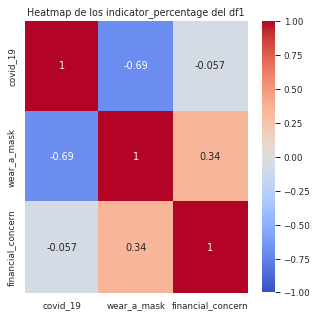

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Heatmap de los indicator_percentage del df1');
sns.heatmap(df_1_only_indicator_percentage.corr(),vmin=-1,vmax=1,annot=True,cmap='coolwarm');

###### **Df2**

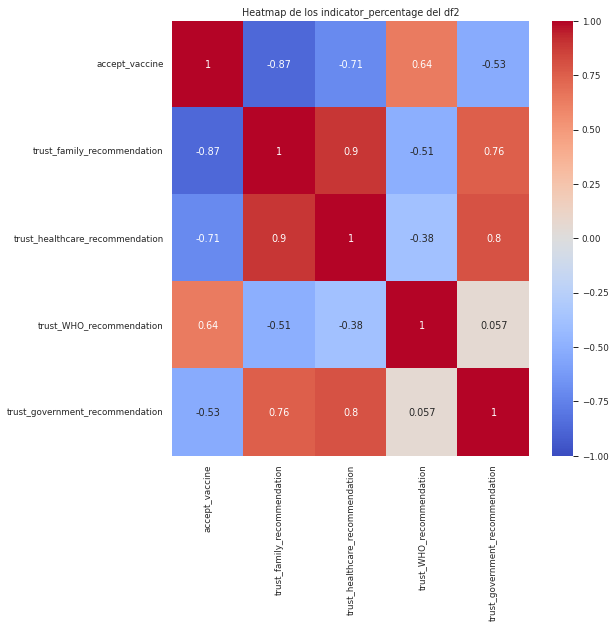

In [ ]:
plt.figure(figsize=(8,8))
plt.title('Heatmap de los indicator_percentage del df2');
sns.heatmap(df_2_only_indicator_percentage.corr(),vmin=-1,vmax=1,annot=True,cmap='coolwarm');

###### **Df3**

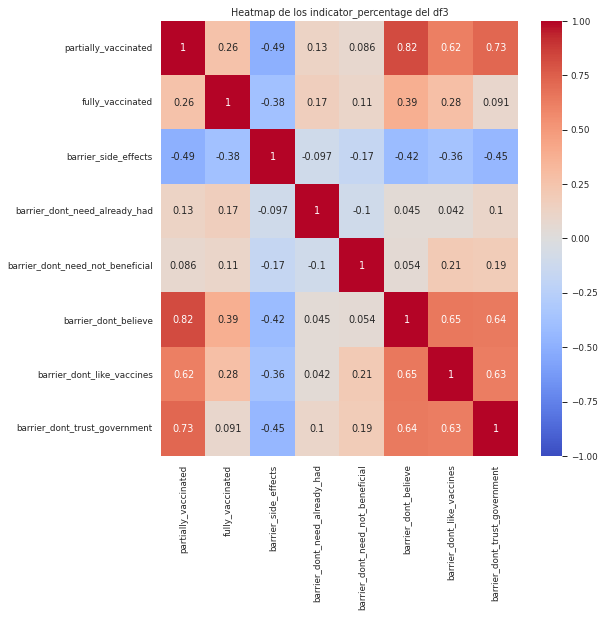

In [ ]:
plt.figure(figsize=(8,8))
plt.title('Heatmap de los indicator_percentage del df3');
sns.heatmap(df_3_only_indicator_percentage.corr(),vmin=-1,vmax=1,annot=True,cmap='coolwarm');

##### **3. Generación de pairplots**

In [ ]:
# Lo primero que vamos a hacer es crear un filtro para dejar fuera las columnas de partially_vaccinated y fully_vaccinated
df_3_only_indicator_percentage_filtered=df_3_only_indicator_percentage.iloc[:,[2,3,4,5,6,7]]
df_3_only_indicator_percentage_filtered.head(2)

,barrier_side_effects,barrier_dont_need_already_had,barrier_dont_need_not_beneficial,barrier_dont_believe,barrier_dont_like_vaccines,barrier_dont_trust_government
0,0.573751,0.139143,0.244192,0.050306,0.054113,0.0
1,0.570975,0.205662,0.132152,0.049256,0.067466,0.0


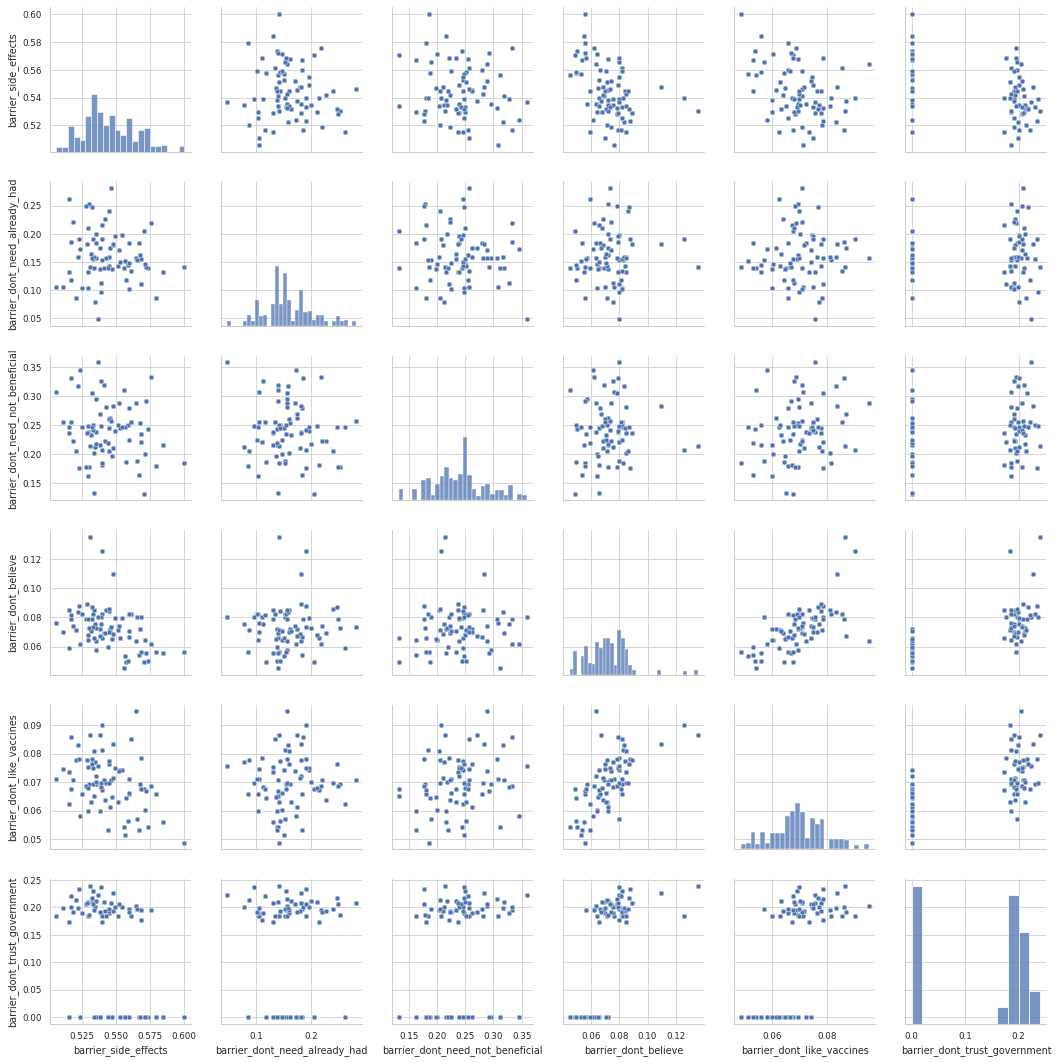

In [ ]:
# Generamos el pairplot
sns.pairplot(data=df_3_only_indicator_percentage_filtered);

##### **4. Generación de scatterplots**

###### **Scatterplot con financial_concer y covid_19**

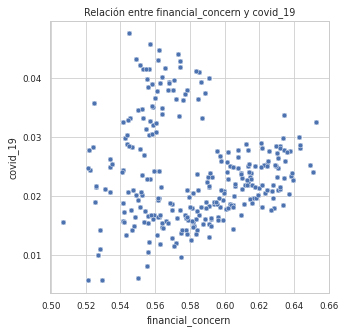

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Relación entre financial_concern y covid_19')
sns.scatterplot(x=df_1_only_indicator_percentage['financial_concern'],y=df_1_only_indicator_percentage['covid_19']); 

###### **Scatterplot con wear_a_mask y covid_19**

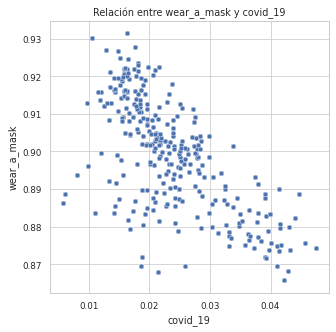

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Relación entre wear_a_mask y covid_19')
sns.scatterplot(x=df_1_only_indicator_percentage['covid_19'],y=df_1_only_indicator_percentage['wear_a_mask']); # Ojo aqui ya que al usar mascara se contagiaron menos.

###### **Scatterplot con trust_WHO_recommendation y accept_vaccine**

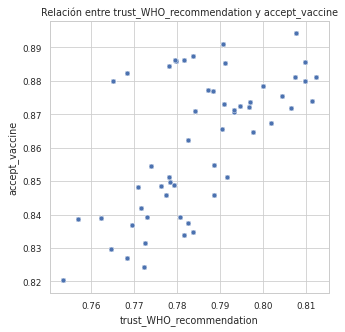

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Relación entre trust_WHO_recommendation y accept_vaccine')
sns.scatterplot(x=df_2_only_indicator_percentage['trust_WHO_recommendation'],y=df_2_only_indicator_percentage['accept_vaccine']);

###### **Scatterplot con trust_family_recommendation y accept_vaccine**

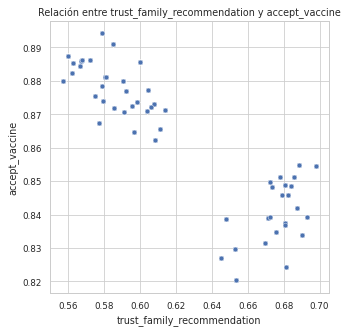

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Relación entre trust_family_recommendation y accept_vaccine')
sns.scatterplot(x=df_2_only_indicator_percentage['trust_family_recommendation'],y=df_2_only_indicator_percentage['accept_vaccine']);

###### **Scatterplot con barrier_dont_believe y barrier_dont_like_vaccines**

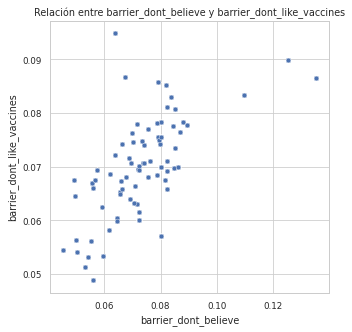

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Relación entre barrier_dont_believe y barrier_dont_like_vaccines')
sns.scatterplot(x=df_3_only_indicator_percentage['barrier_dont_believe'],y=df_3_only_indicator_percentage['barrier_dont_like_vaccines']);

###### **Scatterplot con barrier_dont_believe y barrier_side_effects**

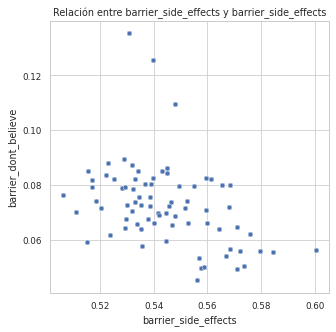

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Relación entre barrier_side_effects y barrier_side_effects')
sns.scatterplot(x=df_3_only_indicator_percentage['barrier_side_effects'],y=df_3_only_indicator_percentage['barrier_dont_believe']);

###### **Observaciones**

- La primera y más importante es que existe una correlación negativa entre el uso de cubrebocas y el contagio de la enfermedad, algo que a simple vista es evidente pero hay muchas personas escepticas de esto, por lo que con el analisis anterior no debe quedar duda.
- Otra cosa interesante es que entre más se cree en las recomendaciones la OMS es más probable que se acepte la vacuna, por el contrario entre más se cree en las recomendaciones de la familia menos se acepta la vacuna, algo realmente curioso a lo que se le debe poner atención, ya que los propios familiares podrian causar que no se acepte la vacuna.
- Una correlación que es sorpredente es que cuando a las personas no les gusta vacunarse, suelen no creer en el covid-19, por lo que quiza si se les pudiera ayudar con este miedo, empezarían a creer más.
- Por último algo interesante ya que cuanto más alto sea el exceptisimo hacia la existencia del covid-19, lo que termina sucediendo es que las personas suelen dejar de lado el pretexto de que rechazan la vacuna por sus efectos secundarios. 




##### **5. Generación de una regresión lineal simple**

El score en esta regresión lineal es de: 0.4821280303825061


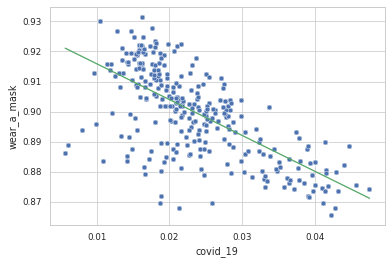

In [ ]:
# Primero instaciamos el objeto
linear_regression=LinearRegression()
#Fit
linear_regression.fit(df_1_only_indicator_percentage['covid_19'].to_frame(),df_1_only_indicator_percentage['wear_a_mask'])
y_predict_01=linear_regression.predict(df_1_only_indicator_percentage['covid_19'].to_frame())
# Creación del plot con su calificación
sns.scatterplot(x=df_1_only_indicator_percentage['covid_19'],y=df_1_only_indicator_percentage['wear_a_mask'])
sns.lineplot(x=df_1_only_indicator_percentage['covid_19'],y=y_predict_01, color='g');
score_01=linear_regression.score(df_1_only_indicator_percentage['covid_19'].to_frame(),df_1_only_indicator_percentage['wear_a_mask'])
print(f'El score en esta regresión lineal es de: {score_01}')

##### **6. Generación de una regresión lineal multivariable**

In [ ]:
# Primero definimos las variables con las que vamos a trabajar
X= df_2_only_indicator_percentage[['trust_healthcare_recommendation','trust_government_recommendation', 'trust_family_recommendation']]
y= df_2_only_indicator_percentage['accept_vaccine']
# Dividimos los conjuntos para entrenamiento
X_training, X_test, y_training, y_test=train_test_split(X,y,test_size=.3,shuffle=True)
# Intanciamos el objeto
lr=LinearRegression()
# Hacemos el fit
lr.fit(X_training,y_training)
# Obtenemos la califación, ojo aqui no se hace un plot por razones evidentes
score_02=lr.score(X_test,y_test)
print(f'La calificación en esta regresión es de: {score_02}')

La calificación en esta regresión es de: 0.8137583725398537


#### _**Sesión 5:** Distribuciones muestrales y Técnicas de evaluación de modelos_

##### **1. Revisión de medidas de locación y dispersión**

Identifica las variables numéricas en tu dataset y revisa las medidas de locación y dispersión que ya has realizado de ellas.

In [ ]:
df_summary.head()

,mean,weighted_mean,trimmed_mean,median,std,range,percentile_0.25,percentile_0.75,IQR
financial_concern,3365.0,4085.0,3301.0,3200.0,1629.0,6923.0,1878.0,4684.0,2806.0
accept_vaccine,8379.0,8491.0,8431.0,8741.0,963.0,4296.0,7525.0,9120.0,1595.0
barrier_side_effects,1115.0,1181.0,1105.0,1083.0,285.0,1587.0,911.0,1327.0,417.0


Toda la sección trabajará con las columnas de amount_of_positive_answers correspondientes a cada rubro listado 

(financial_concern, accept_vaccine, barrier_side_effects)

##### **2. Técnica de Bootstrap**

###### Utilizando la técnica de bootstrap, exploraremos las distribuciones muestrales.

In [ ]:
finconc_btst = df_2_accept_vaccine['amount_of_positive_answers']
finconc_means = []
for i in range(100_000):
    sample = finconc_btst.sample(n=50, replace=True)
    finconc_means.append(sample.mean())
serie_finconc_means = pd.Series(finconc_means)

In [ ]:
accvac_btst = df_2_accept_vaccine['amount_of_positive_answers']
accvac_means = []
for i in range(100_000):
    sample = accvac_btst.sample(n=50, replace=True)
    accvac_means.append(sample.mean())
serie_accvac_means = pd.Series(accvac_means)

In [ ]:
barrsidef_btst = df_2_accept_vaccine['amount_of_positive_answers']
barrsidef_means = []
for i in range(100_000):
    sample = barrsidef_btst.sample(n=50, replace=True)
    barrsidef_means.append(sample.mean())
serie_barrsidef_means = pd.Series(barrsidef_means)

###### **Distribución, asimetría y curtosis**

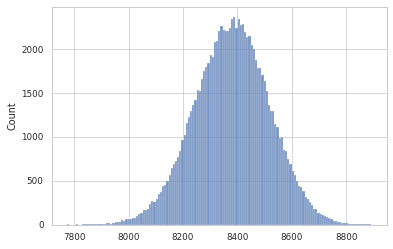

In [ ]:
sns.histplot(data=serie_finconc_means);

In [ ]:
serie_finconc_means.skew()

-0.07049235226688912

In [ ]:
serie_finconc_means.kurtosis()

-0.007219589377750246

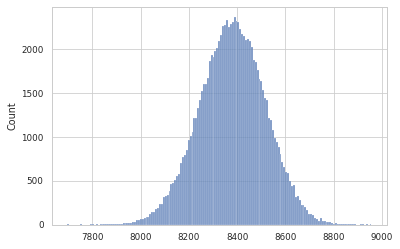

In [ ]:
sns.histplot(data=serie_accvac_means);

In [ ]:
serie_accvac_means.skew()

-0.07620118441430417

In [ ]:
serie_accvac_means.kurtosis()

0.00753209758047424

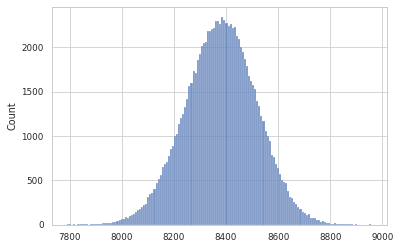

In [ ]:
sns.histplot(data=serie_barrsidef_means);

In [ ]:
serie_barrsidef_means.skew()

-0.07131110737164713

In [ ]:
serie_barrsidef_means.kurtosis()

-0.021635283697250873

###### **Error Estándar**

Error estandar: 136.82476529528253
Valor mínimo: 7774.223980559999
Valor máximo: 8892.132016520001
Rango: 1117.908035960002


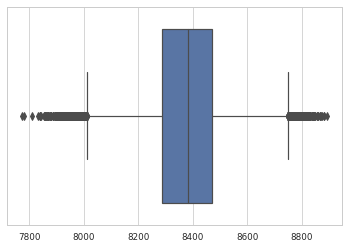

In [ ]:
print(f'Error estandar: {serie_finconc_means.std()}')
print(f'Valor mínimo: {serie_finconc_means.min()}')
print(f'Valor máximo: {serie_finconc_means.max()}')
print(f'Rango: {serie_finconc_means.max() - serie_finconc_means.min()}')
sns.boxplot(x = serie_finconc_means);

Error estandar: 136.54398171493466
Valor mínimo: 7694.881466479998
Valor máximo: 8956.72349046
Rango: 1261.8420239800025


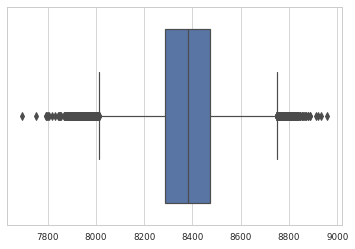

In [ ]:
print(f'Error estandar: {serie_accvac_means.std()}')
print(f'Valor mínimo: {serie_accvac_means.min()}')
print(f'Valor máximo: {serie_accvac_means.max()}')
print(f'Rango: {serie_accvac_means.max() - serie_accvac_means.min()}')
sns.boxplot(x = serie_accvac_means);

Error estandar: 135.9996831707569
Valor mínimo: 7789.36636024
Valor máximo: 8958.58890788
Rango: 1169.222547639999


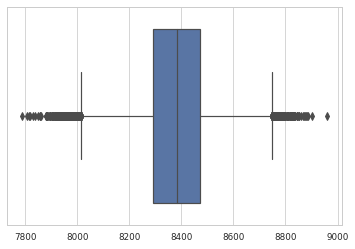

In [ ]:
print(f'Error estandar: {serie_barrsidef_means.std()}')
print(f'Valor mínimo: {serie_barrsidef_means.min()}')
print(f'Valor máximo: {serie_barrsidef_means.max()}')
print(f'Rango: {serie_barrsidef_means.max() - serie_barrsidef_means.min()}')
sns.boxplot(x = serie_barrsidef_means);

###### **Intervalo de Confianza**

Intervalo de 95% confianza de la media: 8106.786855907499 < 8379.133603142645 < 8643.078741144502
Intervalo de 95% confianza de la media: 8379.133603142645 +/- 268.1459426185015


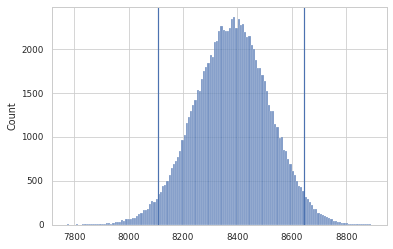

In [ ]:
lim_inf = serie_finconc_means.quantile(0.025)
lim_sup = serie_finconc_means.quantile(0.975)
print(f'Intervalo de 95% confianza de la media: {lim_inf} < {serie_finconc_means.mean()} < {lim_sup}')
print(f'Intervalo de 95% confianza de la media: {serie_finconc_means.mean()} +/- {((serie_finconc_means.mean() - lim_inf) + (lim_sup - serie_finconc_means.mean())) / 2}')
sns.histplot(data = serie_finconc_means)
plt.axvline(lim_inf)
plt.axvline(lim_sup);

Intervalo de 95% confianza de la media: 8106.3157436795 < 8379.22771912408 < 8640.906719307499
Intervalo de 95% confianza de la media: 8379.22771912408 +/- 267.29548781399944


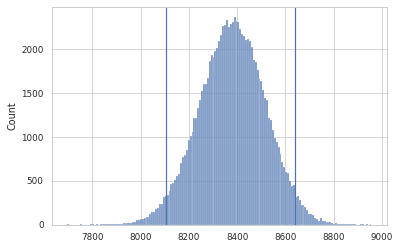

In [ ]:
lim_inf = serie_accvac_means.quantile(0.025)
lim_sup = serie_accvac_means.quantile(0.975)
print(f'Intervalo de 95% confianza de la media: {lim_inf} < {serie_accvac_means.mean()} < {lim_sup}')
print(f'Intervalo de 95% confianza de la media: {serie_accvac_means.mean()} +/- {((serie_accvac_means.mean() - lim_inf) + (lim_sup - serie_accvac_means.mean())) / 2}')
sns.histplot(data = serie_accvac_means)
plt.axvline(lim_inf)
plt.axvline(lim_sup);

Intervalo de 95% confianza de la media: 8109.487154916502 < 8380.041965265933 < 8641.659977633
Intervalo de 95% confianza de la media: 8380.041965265933 +/- 266.0864113582493


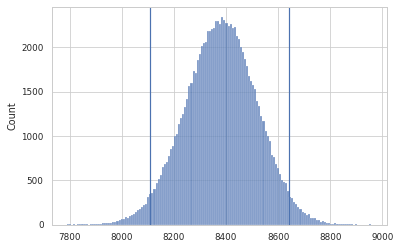

In [ ]:
lim_inf = serie_barrsidef_means.quantile(0.025)
lim_sup = serie_barrsidef_means.quantile(0.975)
print(f'Intervalo de 95% confianza de la media: {lim_inf} < {serie_barrsidef_means.mean()} < {lim_sup}')
print(f'Intervalo de 95% confianza de la media: {serie_barrsidef_means.mean()} +/- {((serie_barrsidef_means.mean() - lim_inf) + (lim_sup - serie_barrsidef_means.mean())) / 2}')
sns.histplot(data = serie_barrsidef_means)
plt.axvline(lim_inf)
plt.axvline(lim_sup);

##### **3. Regresión Lineal Múltiple**

###### Preparación de Regresión Lineal Múltiple.

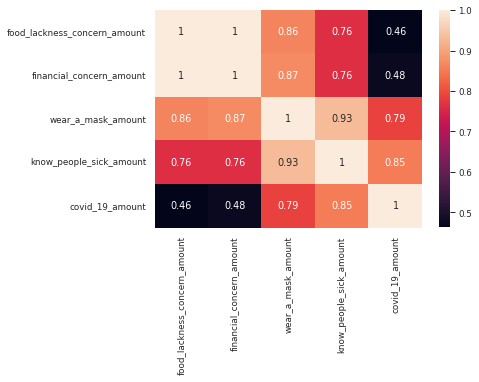

In [ ]:
df_regmult = pd.DataFrame()
df_regmult.insert(0,'covid_19_amount', df1['covid_19']['indicator_percentage']*df1['covid_19']['sample_size'])
df_regmult.insert(0,'know_people_sick_amount', df1['know_people_sick']['indicator_percentage']*df1['know_people_sick']['sample_size'])
df_regmult.insert(0,'wear_a_mask_amount', df1['wear_a_mask']['indicator_percentage']*df1['wear_a_mask']['sample_size'])
df_regmult.insert(0,'financial_concern_amount', df1['financial_concern']['indicator_percentage']*df1['financial_concern']['sample_size'])
df_regmult.insert(0,'food_lackness_concern_amount', df1['food_lackness_concern']['indicator_percentage']*df1['food_lackness_concern']['sample_size'])
sns.heatmap(df_regmult.corr(), annot=True);

###### División, Entrenamiento y Score de Regresión Lineal Múltiple.

In [ ]:
from sklearn.model_selection import train_test_split
X1 = df_regmult[['know_people_sick_amount', 'wear_a_mask_amount','financial_concern_amount','food_lackness_concern_amount']]
Y1 = df_regmult['covid_19_amount']
X1_training, X1_test, Y1_training, Y1_test = train_test_split(X1, Y1, test_size=0.3, shuffle=True)
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
lr1.fit(X1_training, Y1_training)
lr1.score(X1_test, Y1_test)

0.8808951944580523

In [ ]:
from sklearn.model_selection import train_test_split
X2 = df_regmult[['covid_19_amount','wear_a_mask_amount','financial_concern_amount','food_lackness_concern_amount']]
Y2 = df_regmult['know_people_sick_amount']
X2_training, X2_test, Y2_training, Y2_test = train_test_split(X2, Y2, test_size=0.3, shuffle=True)
from sklearn.linear_model import LinearRegression
lr2 = LinearRegression()
lr2.fit(X2_training, Y2_training)
lr2.score(X2_test, Y2_test)

0.9400585377603409

In [ ]:
from sklearn.model_selection import train_test_split
X3 = df_regmult[['covid_19_amount','wear_a_mask_amount','financial_concern_amount','know_people_sick_amount']]
Y3 = df_regmult['food_lackness_concern_amount']
X3_training, X3_test, Y3_training, Y3_test = train_test_split(X3, Y3, test_size=0.3, shuffle=True)
from sklearn.linear_model import LinearRegression
lr3 = LinearRegression()
lr3.fit(X3_training, Y3_training)
lr3.score(X3_test, Y3_test)

0.9975926834417795

###### **Validación Cruzada de K-iteraciones**

In [ ]:
scores1 = cross_validate(lr1, X1, Y1, scoring='r2')
print(f'Score del modelo: {scores1["test_score"].mean():.3f} +/- {scores1["test_score"].std():.3f}')

Score del modelo: 0.884 +/- 0.001


Se puede predecir con 88.4% de confianza la cantidad de personas contagiadas sabiendo la otra información. Esto puede ayudar a reconfirmar las pruebas de laboratorio o la palabra de los asistentes según el origen del diagnóstico.

In [ ]:
scores2 = cross_validate(lr2, X2, Y2, scoring='r2')
print(f'Score del modelo: {scores2["test_score"].mean():.3f} +/- {scores2["test_score"].std():.3f}')

Score del modelo: 0.941 +/- 0.002


Se puede predecir con 94.1% de confianza la cantidad de personas que conocen a alguien contagiado sabiendo la otra información. Esto puede ayudar a validar la declaración de los asistentes respecto a su vínculo.

In [ ]:
scores3 = cross_validate(lr3, X3, Y3, scoring='r2')
print(f'Score del modelo: {scores3["test_score"].mean():.3f} +/- {scores3["test_score"].std():.3f}')

Score del modelo: 0.998 +/- 0.000


Se puede predecir con 99.8% de confianza la cantidad de personas que se preocupan de su falta de alimentos conociendo la demás información. Esto no es una sorpresa pues la correlación con la variable de preocupación financiera es casi perfecta.

#### _**Sesión 6:** Visualización de datos avanzada_

In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_visual = df_regmult.copy();
df_visual.insert(5,'high_covid_19_amount',df_visual['covid_19_amount'].quantile(0.75)<df_visual['covid_19_amount'])
df_visual.head()

,food_lackness_concern_amount,financial_concern_amount,wear_a_mask_amount,know_people_sick_amount,covid_19_amount,high_covid_19_amount
0,2923.300273,4405.280776,6706.167615,2066.578956,195.712309,False
1,3274.338255,4862.687542,7533.336456,2090.202016,190.749000,False
2,3250.450840,4838.155344,7493.669274,2162.543418,238.977000,False
3,3259.728854,4795.542620,7392.770640,2078.025386,241.780140,False
4,3084.109124,4548.182970,7360.133184,2088.438010,209.874080,False


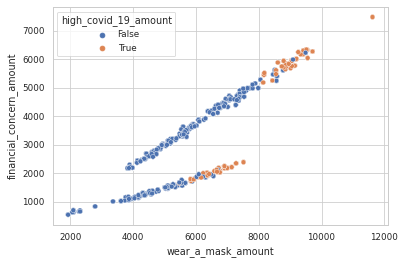

In [ ]:
sns.scatterplot( x=df_visual['wear_a_mask_amount'], y=df_visual['financial_concern_amount'], hue=df_visual['high_covid_19_amount']);

En esta visualización avanzada podemos observar que:
-	Hay una relación casi lineal entre la preocupación financiera y utilizar cubre bocas. Sin embargo, parecen existir dos tipos de poblaciones con susceptibilidades diferentes a utilizarlo. Quizá exista una relación con los niveles económicos de los encuestados cada día.
-	Ambas poblaciones identificables cumplen que a mayor preocupación financiera mayor probabilidad de utilizar el cubre bocas.
-	También puede observarse que para ambos tipos de población los máximos de preocupación y uso de cubre bocas se alcanzan en los días que hay más personas contagiadas de covid 19.


In [ ]:
df_visual['population_type'] = ["1" if s <= 4000 else "2" for s in (4*df_visual['financial_concern_amount']-df_visual['wear_a_mask_amount'])] 

In [ ]:
df_visual_tipo1 = df_visual[df_visual['population_type']=='1']
df_visual_tipo2 = df_visual[df_visual['population_type']=='2']

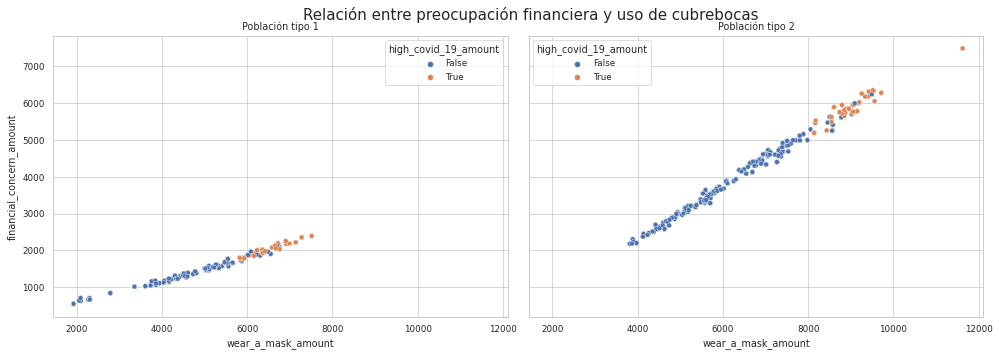

In [ ]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(14, 5))
axes = fig.subplots(1, 2, sharex=True, sharey=True)
sns.scatterplot( x=df_visual_tipo1['wear_a_mask_amount'], y=df_visual_tipo1['financial_concern_amount'], ax=axes[0], hue=df_visual_tipo1['high_covid_19_amount'])
sns.scatterplot( x=df_visual_tipo2['wear_a_mask_amount'], y=df_visual_tipo2['financial_concern_amount'], ax=axes[1], hue=df_visual_tipo2['high_covid_19_amount'])
axes[0].set_title('Población tipo 1')
axes[1].set_title('Población tipo 2')
fig.suptitle('Relación entre preocupación financiera y uso de cubrebocas', fontsize=15, x=0.53)
plt.tight_layout()
plt.subplots_adjust(top=0.9)

Separando las poblaciones es más clara la relación lineal y se pueden entrenar regresiones lineales simples.

In [ ]:
from sklearn.model_selection import train_test_split
X1 = df_visual_tipo1[['wear_a_mask_amount']]
Y1 = df_visual_tipo1['financial_concern_amount']
X1_training, X1_test, Y1_training, Y1_test = train_test_split(X1, Y1, test_size=0.3, shuffle=True)
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
lr1.fit(X1_training, Y1_training)
lr1.score(X1_test, Y1_test)

scores1 = cross_validate(lr1, X1, Y1, scoring='r2')
print(f'Score del modelo: {scores1["test_score"].mean():.3f} +/- {scores1["test_score"].std():.3f}')

Score del modelo: 0.980 +/- 0.000


In [ ]:
from sklearn.model_selection import train_test_split
X2 = df_visual_tipo1[['wear_a_mask_amount']]
Y2 = df_visual_tipo1['financial_concern_amount']
X2_training, X2_test, Y2_training, Y2_test = train_test_split(X2, Y2, test_size=0.3, shuffle=True)
from sklearn.linear_model import LinearRegression
lr2 = LinearRegression()
lr2.fit(X2_training, Y2_training)
lr2.score(X2_test, Y2_test)

scores2 = cross_validate(lr2, X2, Y2, scoring='r2')
print(f'Score del modelo: {scores2["test_score"].mean():.3f} +/- {scores2["test_score"].std():.3f}')

Score del modelo: 0.980 +/- 0.000


En ambos casos se logra predecir con una alta probabilidad el número de personas con preocupación financiera considerando cuantas personas usan cubre boca. Para que esta predicción funcione se necesita saber de antemano de que grupo poblacional visitan ese día o que la cantidad de cubre bocas sea extrema menor o extrema mayor.

Todo gracias a la visualización avanzada

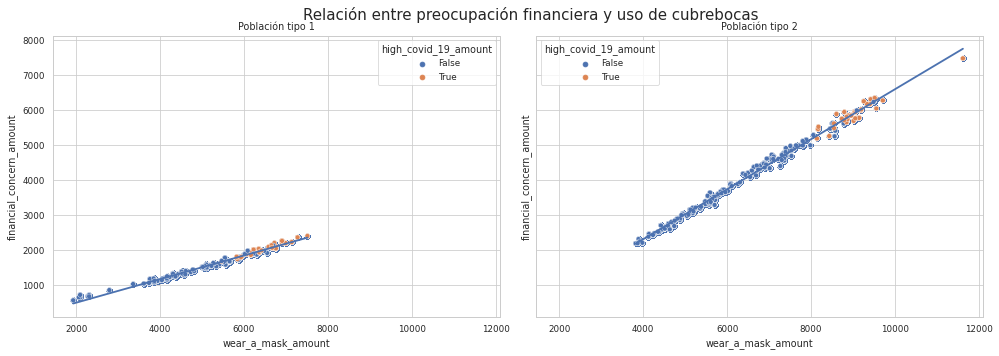

In [ ]:
Y1_pred = lr1.predict(X1)
Y2_pred = lr2.predict(X2)
sns.set_style('whitegrid')
fig = plt.figure(figsize=(14, 5))
axes = fig.subplots(1, 2, sharex=True, sharey=True)
sns.regplot(x=df_visual_tipo1['wear_a_mask_amount'],y=df_visual_tipo1['financial_concern_amount'],ax=axes[0])
sns.scatterplot( x=df_visual_tipo1['wear_a_mask_amount'], y=df_visual_tipo1['financial_concern_amount'], ax=axes[0], hue=df_visual_tipo1['high_covid_19_amount'])
sns.regplot(x=df_visual_tipo2['wear_a_mask_amount'],y=df_visual_tipo2['financial_concern_amount'],ax=axes[1])
sns.scatterplot( x=df_visual_tipo2['wear_a_mask_amount'], y=df_visual_tipo2['financial_concern_amount'], ax=axes[1], hue=df_visual_tipo2['high_covid_19_amount'])
axes[0].set_title('Población tipo 1')
axes[1].set_title('Población tipo 2')
fig.suptitle('Relación entre preocupación financiera y uso de cubrebocas', fontsize=15, x=0.53)
plt.tight_layout()
plt.subplots_adjust(top=0.9)

#### _**Sesión 7:** Pruebas A/B y Procesamiento de lenguaje natural_

In [ ]:
# Importamos las librerías que se usarán en esta parte
import re
import nltk
nltk.download("punkt")
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.util import ngrams

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##### Evaluación de Prueba A/B

Dado que nuestro proyecto no puede hacer uso de una prueba A/B o una evaluación de la misma, decidimos obtener un dataset que no está relacionado para practicar las técnicas empleadas en el análisis de estas pruebas.

Nuestro dataset proviene de una compañía de videojuegos que ha realizado una prueba A/B sobre el comportamiento de sus jugadores en el juego para móviles Cookie Cats. 

Su objetivo era ver si los usuarios jugaban más si la una reja (un obstáculo que impide el progreso en los niveles) estuviera en el nivel 40, en lugar del nivel 30 que es lo normal.

Los jugadores del grupo de control vieron la reja en el nivel 30, mientras que los del grupo experimental la vieron hasta el nivel 40. En las columnas del dataset se registraró el id de cada usuario, el grupo al cual pertenecen, la cantidad de rondas que jugaron, si siguieron jugando después de un día y si siguieron jugando después de una semana.

Para nuestro estudio, solo usaremos el grupo y las rondas.

Más información acerca del dataset se puede consultar en: https://www.kaggle.com/yufengsui/mobile-games-ab-testing

In [ ]:
cats_df = pd.read_csv("https://raw.githubusercontent.com/armando-lv/BEDU-Equipo3-AnalisisPython/main/cookie_cats.csv")
cats_df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [ ]:
cats_df = cats_df[["version", "sum_gamerounds"]]

Para verificar si existe una diferencia entre el nivel 30 y el 40, usaremos la diferencia entre el promedio de los de 40 menos los de 30.

In [ ]:
tcount = cats_df.groupby('version')[["sum_gamerounds"]].mean()
tcount = tcount.rename(columns={"sum_gamerounds": "avg_rounds"})
tcount

,avg_rounds
version,
gate_30,52.456264
gate_40,51.298776


En promedio los del grupo de control jugaron 52.45 rondas, mientras que los del grupo experimental jugaron 51.29. Esto quiere decir que los del grupo 40 en promedio jugaron 1.15 rondas menos.

In [ ]:
gate_40_orig_avg_diff = tcount.loc["gate_40"]["avg_rounds"] - tcount.loc["gate_30"]["avg_rounds"]
gate_40_orig_avg_diff

-1.157488453953249

In [ ]:
gate_c = cats_df["version"].value_counts()
gate_c

gate_40    45489
gate_30    44700
Name: version, dtype: int64

In [ ]:
print(f'El test gate_40 fue {(tcount.loc["gate_40"]["avg_rounds"] / tcount.loc["gate_30"]["avg_rounds"] - 1) * 100:.2f}% menos efectivo que el test gate_30 para motivar a los usuarios a jugar más.')

El test gate_40 fue -2.21% menos efectivo que el test gate_30 para motivar a los usuarios a jugar más.


Los del grupo experimental jugaron en promedio **2.21% menos** que el grupo control. Esto indica que el test **desmotivó** a los usuarios a continuar, pero tenemos que confirmar si esta diferencia es estadísticamente relevante antes de tomar una decisión.

Para confirmar esto, realizaremos un test de permutación donde:
1.  Obtendremos un grupo A del mismo tamaño que el grupo gate_40
2.  Crearemos un grupo B conformado por el resto de los datos
3.  Sacaremos los promedios de cada grupo
4.  Finalmente, restaremos el promedio del grupo A menos el de el grupo B

In [ ]:
avgs_a = []
avgs_b = []

for i in range(100):
    a = cats_df.sample(gate_c.loc['gate_40'], replace=False)
    a_val = a["sum_gamerounds"].mean()
    avgs_a.append(a_val)
    
    b = cats_df.loc[~cats_df.index.isin(a.index)]
    b_val = b["sum_gamerounds"].mean()
    avgs_b.append(b_val)

In [ ]:
results = pd.DataFrame({
    'avgs_a': avgs_a,
    'avgs_b': avgs_b
})

In [ ]:
results["diff_ab"] = results["avgs_a"] - results["avgs_b"]
results

,avgs_a,avgs_b,diff_ab
0,51.745587,52.001566,-0.255979
1,52.173185,51.566421,0.606764
2,52.177164,51.562371,0.614792
3,52.766251,50.962886,1.803365
4,51.910880,51.833356,0.077524
...,...,...,...
95,50.948273,52.812953,-1.864680
96,50.719449,53.045817,-2.326368
97,52.834048,50.893893,1.940155
98,51.194443,52.562438,-1.367996


Ahora debemos graficar la distribucion de las diferencias que sacamos en diff_ab, y pondremos con una línea la diferencia que sacamos en el conjunto de datos original.

Como vemos, la diferencia original se encuentra dentro de la distribución. Esto indica que es un valor normal, y la reducción en motivación entre los grupos no tiene relevancia estadística.

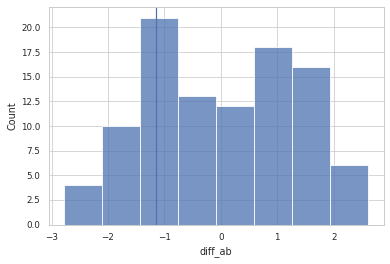

In [ ]:
sns.histplot(results["diff_ab"])
plt.axvline(gate_40_orig_avg_diff);

Para ver nuestro resultado en términos numéricos, sacamos el valor P. Nos dió 0.73, que es un valor mucho mayor a 0.05, por lo tanto nuestro resultado no tiene relevancia estadísticamente significativa.

In [ ]:
(results['diff_ab'] >= gate_40_orig_avg_diff).sum() / results.shape[0]

0.75

##### Dataset y Procesamiento de Texto

**Dataset**
Utilizamos un dataset obtenido de Kaggle que juntó tweets acerca de las distintas vacunas contra el COVID-19, incluyendo Pfizer, Sinovac y Moderna. Estos tweets se obtuvieron con ayuda de Tweepy. Todos los tweets están en inglés. Mas información acerca del conjunto se puede consultar en: https://www.kaggle.com/gpreda/all-covid19-vaccines-tweets

El dataset completo contiene varias columnas, con nombres, ubicaciones y fechas. Para los fines de nuesto análisis de lenguaje, solo haremos uso de la columna text, la cual contiene el texto de un tweet. Cabe recalcar que cada renglón es un tweet.

In [ ]:
tweet_df = pd.read_csv("https://raw.githubusercontent.com/armando-lv/BEDU-Equipo3-AnalisisPython/main/vaccination_all_tweets_only_text.csv")
tweet_df.head()

,text
0,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,"Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine @Bor...


In [ ]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193272 entries, 0 to 193271
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    193272 non-null  object
dtypes: object(1)
memory usage: 1.5+ MB


Después de checar la información de nuestro dataframe, vimos que tiene casi 200 mil tweets. Si queremos convertirlos en un objeto de texto tardaría demasiado, así que solo tomamos como muestra 25 mil.

In [ ]:
tweet_text = tweet_df.sample(n=25000, random_state=1)["text"]

Usamos la funcion de_emojify sobre nuestros tweets para quitar todos los emojis. De esta manera no interfieren con nuestro análisis de texto.

In [ ]:
def de_emojify(string):
    return string.encode('ascii', 'ignore').decode('ascii')

In [ ]:
tweet_text.apply(de_emojify)

59821     @Pun_Jaab @kamalsinghbrar Which one ? #Covaxin...
44291     Interested in learning more about the efficien...
72919     Kizzmekia Corbett - The Scientist Central to t...
86642     Thanks to @BertyThomas \nJust because of ur al...
128159    Pfizer-BioNTech says booster shot provides bet...
                                ...                        
145892    @SamHarrisOrg Here in the developing world we ...
36443     I got my vaccine and they didnt even give me a...
129081    #Concordian was able to secure close to 200 do...
192355    Pincode: 560010\nCOVAXIN - Dose 2: 25 slots\n\...
22875     The #Russian Direct Investment Fund (RDIF) on ...
Name: text, Length: 25000, dtype: object

Muchos de estos tweets contienen nombres de cuentas como @Juan o @Beto, URLs y hashtags. Con el fin de deshacernos de estas cosas, así como quitar los números y otros carácteres especiales, usamos replace() con Regex.

In [ ]:
tweet_text = tweet_text.str.lower()
tweet_text = tweet_text.str.strip()
# Quitar nombres de usuario de Twitter
tweet_text = tweet_text.str.replace("@[^\s]+", "")
# Quitar urls/enlaces
tweet_text = tweet_text.str.replace("http\S+", "")
# Quitar hashtags
tweet_text = tweet_text.str.replace("\B#\S+", "")
# Dejar solo texto
tweet_text = tweet_text.str.replace("[^\w\s]", "")
tweet_text = tweet_text.str.replace("\n", "")
tweet_text = tweet_text.str.replace("\d", "")
tweet_text = tweet_text.dropna()
tweet_text.head()

59821                                         which one    
44291     interested in learning more about the efficien...
72919     kizzmekia corbett  the scientist central to th...
86642     thanks to  just because of ur alerts i was abl...
128159    pfizerbiontech says booster shot provides bett...
Name: text, dtype: object

##### Análisis de Lenguaje con Nltk

Aplicamos tokenize a nuestros tweets para luego convertir el texto de los tweets en un objeto de text.


In [ ]:
token = tweet_text.apply(nltk.word_tokenize)
token 

59821                                          [which, one]
44291     [interested, in, learning, more, about, the, e...
72919     [kizzmekia, corbett, the, scientist, central, ...
86642     [thanks, to, just, because, of, ur, alerts, i,...
128159    [pfizerbiontech, says, booster, shot, provides...
                                ...                        
145892    [here, in, the, developing, world, we, get, to...
36443     [i, got, my, vaccine, and, they, didnt, even, ...
129081    [was, able, to, secure, close, to, doses, of, ...
192355    [pincode, covaxin, dose, slotsage, and, above,...
22875     [the, direct, investment, fund, rdif, on, thur...
Name: text, Length: 25000, dtype: object

In [ ]:
tweet_words = token.sum()
all_text = nltk.Text(tweet_words)
all_text

<Text: which one interested in learning more about the...>

Inicialmente, cuando le dimos una ojeada a nuestro dataset vimos que las palabras dose, vaccine y covid salen a menudo. Claro, es gracias a que el tema del conjunto de tweets es la vacunación contra el Covid. Para ver que palabras se usan con frecuencia al lado o cerca de estas, similar.

In [ ]:
all_text.similar("dose")

shot vaccine jab of doses today and the done one is vaccination
moderna for in on covid shots covaxin day


In [ ]:
all_text.similar("vaccine")

vaccines the shot dose vaccination and jab covid covaxin moderna is
first in today one it second world india this


In [ ]:
all_text.similar("covid")

the vaccine moderna coronavirus a and first my covaxin chinese
vaccines its nd dose or sinopharm mrna pfizer second this


Entre las palabras similares de dose, vaccine y covid, vemos mencionadas todas las tres palabras o sinónimos de ellas. También encontramos la palabra covaxin, un nuevo término que hace referencia a toda vacuna que lucha contra el Covid. Moderna también es otra palabra que sale entre los tres conjuntos.

Aquí vemos en qué contextos se usan las palabras covid y vaccine. Muchas de estas palabras son palabras vacías, las cuales quitaremos después.

In [ ]:
all_text.common_contexts(['covid', 'vaccine'])

of_vaccine first_shot your_shot the_vaccine of_and had_last
coronavirus_in of_in second_shot the_and the_donated first_jab of_done
your_vaccine russian_vaccine of_after of_this the_with the_yesterday
of_doses


Estas son expresiones de múltiples palabras que se ven a menudo dentro de nuestros tweets.

In [ ]:
all_text.collocations()

pincode covaxin; dose slotsage; covaxin dose; aug fees; sep fees;
agesdate sep; covid vaccine; agesdate aug; side effects; date jul;
emergency use; paid slots; slots paid; fully vaccinated; pmfree slots;
first dose; jul fees; bharat biotech; amfree slots; million doses


Al obtener cuantas palabras únicas hay en nuestro texto y dividirlas entre las palabras totales, obtenemos el nivel de riqueza léxica en nuestros tweets. Aquí el nivel de riqueza es de 6.50%

In [ ]:
len(set(all_text)) / len(all_text) * 100

6.504553220428948

Usamos nltk para deshacernos de las palabras vacías, algunos ejemplos en inglés son the, a y of, que no agregan mucho significado a las oraciones pero se usan para darle forma y que se alínie a las reglas de la gramática. 

Aparte de quitar las palabras, creamos un objeto FreqDist con el nuevo conjunto de palabras.

In [ ]:
eng_sw = stopwords.words('english')
all_words_nsw = [word for word in all_text if word not in eng_sw]
fdist_nsw = nltk.FreqDist(all_words_nsw)

Ya que tenemos nuestro FreqDist sin palabras vacías, hay que ver las palabras más comunes.

In [ ]:
fdist_nsw.most_common(50)

[('dose', 5409),
 ('vaccine', 4793),
 ('slots', 2399),
 ('covid', 1984),
 ('covaxin', 1692),
 ('age', 1654),
 ('first', 1591),
 ('got', 1507),
 ('hospital', 1309),
 ('vaccines', 1238),
 ('pincode', 1178),
 ('slotsage', 1173),
 ('fees', 1161),
 ('doses', 1115),
 ('get', 1093),
 ('vaccinated', 1087),
 ('amp', 1054),
 ('today', 1042),
 ('shot', 986),
 ('second', 981),
 ('nd', 913),
 ('vaccination', 762),
 ('agesdate', 754),
 ('india', 713),
 ('st', 707),
 ('moderna', 685),
 ('people', 683),
 ('apollo', 674),
 ('one', 651),
 ('health', 584),
 ('availability', 544),
 ('new', 521),
 ('aug', 513),
 ('us', 505),
 ('done', 498),
 ('im', 487),
 ('date', 480),
 ('good', 467),
 ('use', 465),
 ('like', 465),
 ('sep', 457),
 ('million', 452),
 ('jab', 449),
 ('v', 446),
 ('received', 440),
 ('days', 435),
 ('p', 433),
 ('sputnik', 432),
 ('fully', 424),
 ('effective', 404)]

Una vez que quitamos las palabras vacías, buscamos palabras largas (que tengan más de 8 letras) que salgan con frecuencia.

In [ ]:
aw_unique = set(all_words_nsw)
aw_unique = pd.Series(list(aw_unique))
longer7 = aw_unique.str.len() > 7
freq_longer7 = aw_unique.apply(lambda x: fdist_nsw[x] > 7)
aw_unique[longer7 & freq_longer7]

16       deliveries
26         expected
52         approves
60        infection
61        exhausted
            ...    
19312    appreciate
19336     volunteer
19367      boosters
19374     sinopharm
19406      allergic
Length: 781, dtype: object

¿Cuántas veces se mencionan tres de las palabras más usadas? Para obtener los porcentajes, dividimos la cantidad de veces que se usa cada palabra entre el total de palabras.

In [ ]:
print(f'{(100 * fdist_nsw["covid"] / len(all_words_nsw)):.2f}%')

1.06%


In [ ]:
print(f'{(100 * fdist_nsw["dose"] / len(all_words_nsw)):.2f}%')

2.88%


In [ ]:
print(f'{(100 * fdist_nsw["vaccine"] / len(all_words_nsw)):.2f}%')

2.55%


De la totalidad de las palabras, covid forma el 1.05%, dose forma el 2.87% y vaccine el 2.55%. Las tres juntas son el 6.47% de las palabras en los tweets, al no contar las vacías.

Esto quiere decir que si sacas 20 palabras al azar del conjunto que no tiene vacías, lo más probable es que una de ellas sea una de estas tres.

##### Visualizaciones de Distribuciones y Frecuencias

Generamos una distribución con las palabras más utilizadas. Aquí se ve como las primeras dos palabras (dose y vaccine) conforman aproximadamente el 20% del total.

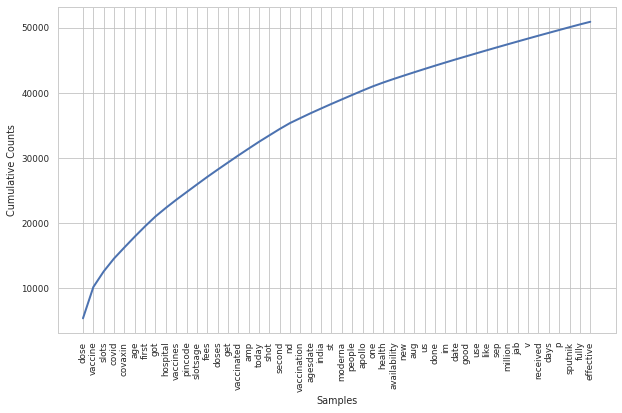

In [ ]:
fig = plt.figure(figsize=(10, 6))
fdist_nsw.plot(50, cumulative=True);

In [ ]:
top50 = fdist_nsw.most_common(50)
top50

[('dose', 5409),
 ('vaccine', 4793),
 ('slots', 2399),
 ('covid', 1984),
 ('covaxin', 1692),
 ('age', 1654),
 ('first', 1591),
 ('got', 1507),
 ('hospital', 1309),
 ('vaccines', 1238),
 ('pincode', 1178),
 ('slotsage', 1173),
 ('fees', 1161),
 ('doses', 1115),
 ('get', 1093),
 ('vaccinated', 1087),
 ('amp', 1054),
 ('today', 1042),
 ('shot', 986),
 ('second', 981),
 ('nd', 913),
 ('vaccination', 762),
 ('agesdate', 754),
 ('india', 713),
 ('st', 707),
 ('moderna', 685),
 ('people', 683),
 ('apollo', 674),
 ('one', 651),
 ('health', 584),
 ('availability', 544),
 ('new', 521),
 ('aug', 513),
 ('us', 505),
 ('done', 498),
 ('im', 487),
 ('date', 480),
 ('good', 467),
 ('use', 465),
 ('like', 465),
 ('sep', 457),
 ('million', 452),
 ('jab', 449),
 ('v', 446),
 ('received', 440),
 ('days', 435),
 ('p', 433),
 ('sputnik', 432),
 ('fully', 424),
 ('effective', 404)]

In [ ]:
words50 = [w[0] for w in top50]
nums50 = [w[1] for w in top50]

Una vez obtenido el conteo de las 50 palabras con mayor frecuencia, usamos seaborn para visualizar una barra de gráficos que nos muestre los datos. La mayoría de las palabras tienen un tono neutral, así que es posible que en promedio los tweets de nuestra muestra tengan intenciones informativas y comunicativas, en lugar de estar en contra de la vacuna.

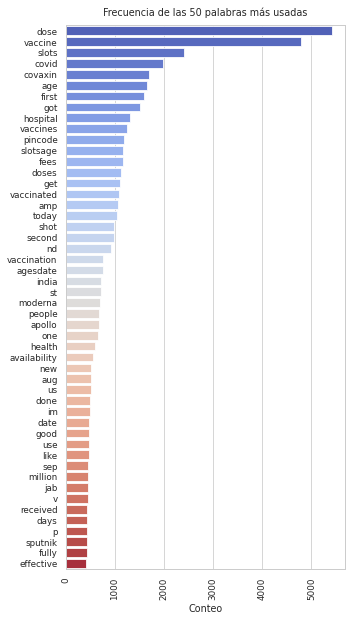

In [ ]:
fig = plt.figure(figsize=(5,10))
ax = fig.add_subplot()

sns.barplot(x=nums50, y=words50, ax=ax, palette="coolwarm");
ax.set_title('Frecuencia de las 50 palabras más usadas', pad=10)
ax.set_xlabel('Conteo')
ax.tick_params(axis='x', rotation=90)

In [ ]:
fdist_bigrams = nltk.FreqDist(list(nltk.bigrams(all_text)))
top25bi = fdist_bigrams.most_common(25)
top25bi

[(('slots', 'on'), 1523),
 (('age', 'd'), 1478),
 (('d', 'd'), 1478),
 (('d', 'slots'), 1478),
 (('dose', 'slotsage'), 1173),
 (('of', 'the'), 1172),
 (('covaxin', 'dose'), 1114),
 (('dose', 'at'), 1114),
 (('pincode', 'covaxin'), 1108),
 (('dose', 'of'), 1022),
 (('and', 'above'), 997),
 (('slotsage', 'and'), 990),
 (('covid', 'vaccine'), 835),
 (('above', 'all'), 767),
 (('all', 'agesdate'), 754),
 (('the', 'vaccine'), 689),
 (('doses', 'of'), 660),
 (('in', 'the'), 659),
 (('got', 'my'), 652),
 (('first', 'dose'), 587),
 (('for', 'at'), 526),
 (('slots', 'dose'), 522),
 (('availability', 'for'), 518),
 (('nd', 'dose'), 487),
 (('aug', 'fees'), 478)]

In [ ]:
words25bi = [x[0] for x in top25bi]
nums25bi = [x[1] for x in top25bi]
words25bistr = [i[0]+", "+i[1] for i in words25bi]

Realizamos el mismo proceso con los bigramas, haciendo inclusión de las palabras vacías.

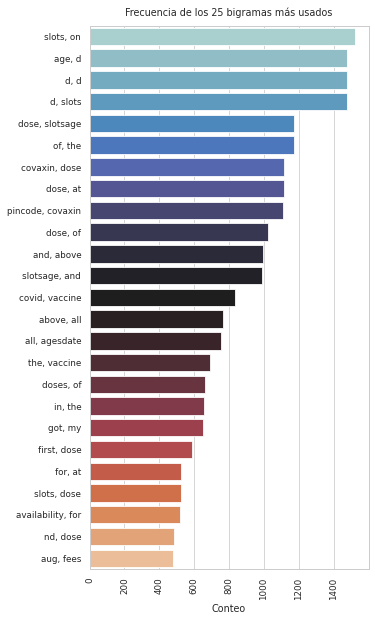

In [ ]:
fig = plt.figure(figsize=(5,10))
ax = fig.add_subplot()

sns.barplot(x=nums25bi, y=words25bistr, ax=ax, palette="icefire");
ax.set_title('Frecuencia de los 25 bigramas más usados', pad=10)
ax.set_xlabel('Conteo')
ax.tick_params(axis='x', rotation=90)

In [ ]:
fdist_bigrams_ns = nltk.FreqDist(list(nltk.bigrams(all_words_nsw)))
top25bi_ns = fdist_bigrams_ns.most_common(25)
top25bi_ns

[(('age', 'slots'), 1480),
 (('dose', 'slotsage'), 1173),
 (('covaxin', 'dose'), 1116),
 (('pincode', 'covaxin'), 1108),
 (('covid', 'vaccine'), 841),
 (('slotsage', 'agesdate'), 754),
 (('first', 'dose'), 588),
 (('slots', 'dose'), 523),
 (('nd', 'dose'), 488),
 (('aug', 'fees'), 478),
 (('sep', 'fees'), 439),
 (('second', 'dose'), 428),
 (('slotsage', 'date'), 407),
 (('agesdate', 'sep'), 393),
 (('got', 'first'), 363),
 (('agesdate', 'aug'), 361),
 (('slots', 'apollo'), 349),
 (('sputnik', 'v'), 347),
 (('st', 'dose'), 336),
 (('paid', 'slots'), 312),
 (('slots', 'paid'), 310),
 (('fully', 'vaccinated'), 289),
 (('availability', 'pmfree'), 285),
 (('pmfree', 'slots'), 285),
 (('side', 'effects'), 273)]

In [ ]:
words25bi_ns = [i[0] for i in top25bi_ns]
nums25bi_ns = [i[1] for i in top25bi_ns]
words25bistr_ns = [i[0]+", "+i[1] for i in words25bi_ns]

De nuevo mostramos los bigramas, ahora excluyendo las palabras vacías. Slots, dose y covaxin salen a menudo en estos bigramas.

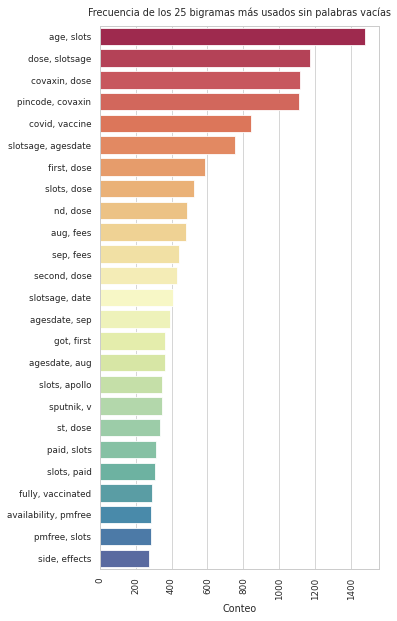

In [ ]:
fig = plt.figure(figsize=(5,10))
ax = fig.add_subplot()

sns.barplot(x=nums25bi_ns, y=words25bistr_ns, ax=ax, palette="Spectral");
ax.set_title('Frecuencia de los 25 bigramas más usados sin palabras vacías', pad=10)
ax.set_xlabel('Conteo')
ax.tick_params(axis='x', rotation=90)

In [ ]:
fdist_tri = nltk.FreqDist(list(ngrams(all_text, 3)))
top25tri = fdist_tri.most_common(25)

words25tri = [i[0] for i in top25tri]
nums25tri = [i[1] for i in top25tri]
words25tristr = [i[0]+", "+i[1]+", "+i[2] for i in words25tri]

Ahora buscamos los trigramas que tienen la mayor frecuencia. Otra vez incluyendo a las palabras vacías.

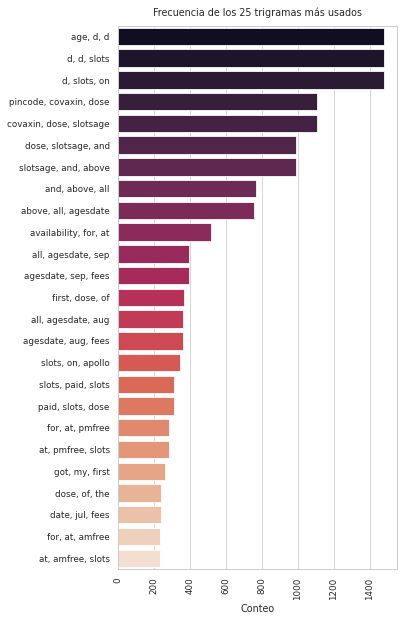

In [ ]:
fig = plt.figure(figsize=(5,10))
ax = fig.add_subplot()

sns.barplot(x=nums25tri, y=words25tristr, ax=ax, palette="rocket");
ax.set_title('Frecuencia de los 25 trigramas más usados', pad=10)
ax.set_xlabel('Conteo')
ax.tick_params(axis='x', rotation=90)

In [ ]:
fdist_tri_ns = nltk.FreqDist(list(ngrams(all_words_nsw, 3)))
top25tri_ns = fdist_tri_ns.most_common(25)

words25tri_ns = [i[0] for i in top25tri_ns]
nums25tri_ns = [i[1] for i in top25tri_ns]
words25tristr_ns = [i[0]+", "+i[1]+", "+i[2] for i in words25tri_ns]

Ahora los 25 trigramas de mayor frecuencia sin palabras vacías.

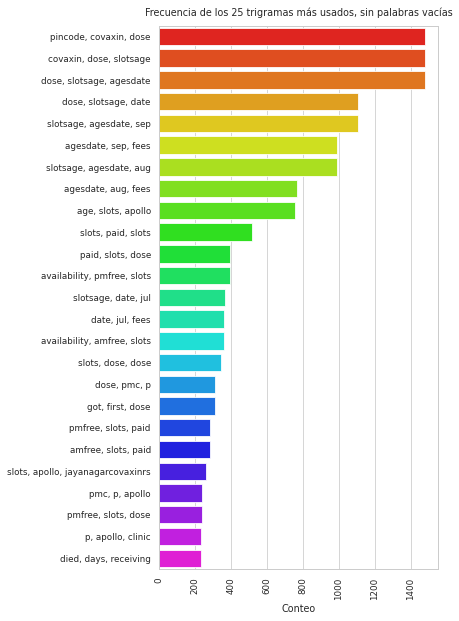

In [ ]:
fig = plt.figure(figsize=(5,10))
ax = fig.add_subplot()

sns.barplot(x=nums25tri, y=words25tristr_ns, ax=ax, palette='gist_rainbow');
ax.set_title('Frecuencia de los 25 trigramas más usados, sin palabras vacías', pad=10)
ax.set_xlabel('Conteo')
ax.tick_params(axis='x', rotation=90)

Para ver la composición de nuestros tweets, graficamos la distribución de las longitudes de palabras. La mayoría de las palabras radican entre las 4 y 7 letras y aunque existen palabras de más de 15 letras.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


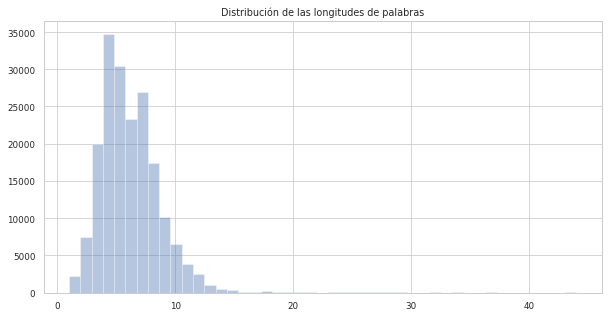

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()

lengths = [len(i) for i in all_words_nsw]
ax.set_title("Distribución de las longitudes de palabras")
sns.distplot(lengths, bins=max(lengths)+1, kde=False, norm_hist=False);

Ahora mostramos la distribución de las longitudes de los tweets, es decir, cuantos carácteres tiene cada tweet. Si bien el límite es de 280 letras, se recomienda mantener un conteo de 70-140 caracteres para maximizar la atención de los lectores.

Efectivamente, gran parte de los datos se encuentra en este rango.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


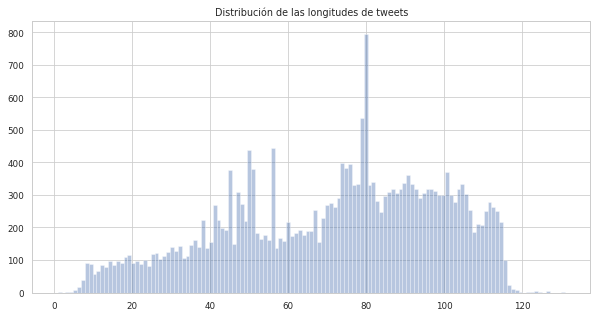

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()

tweet_lengths = [len(i) for i in tweet_text]
ax.set_title("Distribución de las longitudes de tweets")
sns.distplot(tweet_lengths, bins=max(tweet_lengths), kde=False, norm_hist=False);

Ahora vemos la distribución de las cantidades de palabras por tweet. Parece ser que tener 20 palabras por tweet es lo popular.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


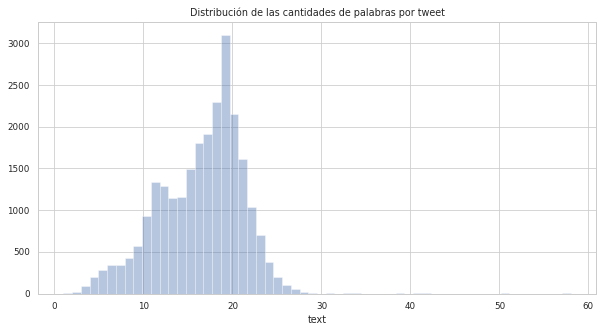

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()

wordcount = tweet_text.str.split(' ').str.len()
ax.set_title("Distribución de las cantidades de palabras por tweet")
sns.distplot(wordcount, bins=max(wordcount), kde=False, norm_hist=False);

Finalmente, usamos WordCloud para mostrar la frecuencia de palabras mediante tamaños de palabras distintos. De nuevo, vaccine, age y slots predominan en el conjunto.

In [ ]:
from wordcloud import WordCloud

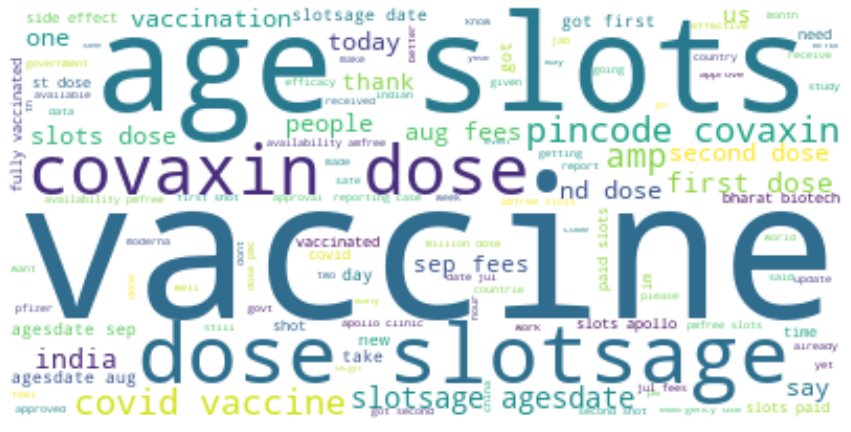

In [ ]:
wcloud = WordCloud(max_font_size=100, background_color="white").generate(' '.join(all_words_nsw))

plt.figure(figsize=(15, 15))
plt.imshow(wcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### _**Sesión 8:** Introducción a Machine Learning: clasificación no supervisada y supervisada_

##### **Preparación**

In [ ]:
df_rlogistica = df_regmult.copy();
df_rlogistica.insert(5,'high_covid_19_amount',df_visual['covid_19_amount'].quantile(0.65)<df_visual['covid_19_amount'])
df_rlogistica['high_covid_19_amount'] = df_rlogistica['high_covid_19_amount'].apply(lambda x: 1 if x else 0)
df_rlogistica.head()

,food_lackness_concern_amount,financial_concern_amount,wear_a_mask_amount,know_people_sick_amount,covid_19_amount,high_covid_19_amount
0,2923.300273,4405.280776,6706.167615,2066.578956,195.712309,0
1,3274.338255,4862.687542,7533.336456,2090.202016,190.749000,0
2,3250.450840,4838.155344,7493.669274,2162.543418,238.977000,1
3,3259.728854,4795.542620,7392.770640,2078.025386,241.780140,1
4,3084.109124,4548.182970,7360.133184,2088.438010,209.874080,0


In [ ]:
X = df_rlogistica.drop(columns=['covid_19_amount', 'high_covid_19_amount'])
Y = df_rlogistica['high_covid_19_amount']
X.head()

,food_lackness_concern_amount,financial_concern_amount,wear_a_mask_amount,know_people_sick_amount
0,2923.300273,4405.280776,6706.167615,2066.578956
1,3274.338255,4862.687542,7533.336456,2090.202016
2,3250.450840,4838.155344,7493.669274,2162.543418
3,3259.728854,4795.542620,7392.770640,2078.025386
4,3084.109124,4548.182970,7360.133184,2088.438010


##### **Regresión Logística**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
logreg.score(X_test, Y_test)

0.9339622641509434

##### **Evaluación del Modelo**

Matriz de confusión

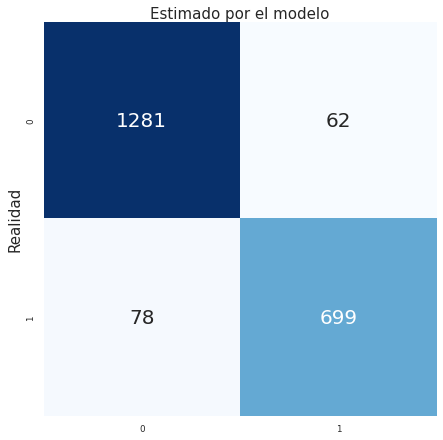

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

In [ ]:
tn, fp, fn, tp = cnf_matrix.ravel()

print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Exactitud:",metrics.accuracy_score(Y_test, Y_pred))
print("Sensibilidad:",metrics.recall_score(Y_test, Y_pred))
print("Especificidad:", tn / (tn + fp))

Precision: 0.9185282522996058
Exactitud: 0.9339622641509434
Sensibilidad: 0.8996138996138996
Especificidad: 0.9538346984363366


El modelo es muy bueno.

Curva ROC/AUC

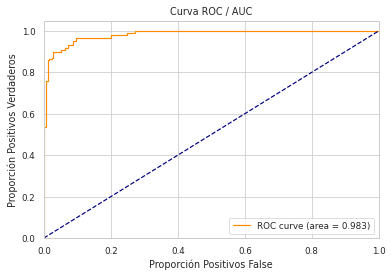

In [ ]:
Y_pred_proba = logreg.predict_proba(X_test)
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(Y_test, Y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Proporción Positivos False')
plt.ylabel('Proporción Positivos Verdaderos')
plt.title('Curva ROC / AUC')
plt.legend(loc="lower right")
plt.show()

Nuestra curva ROC/AUC arroja un valor >.98 muy cercano a 1 por lo que nuestro modelo tiene muy buena capacidad predictiva para decidir. Recordemos que logramos predecir con alta precisión si habrá “muchos” contagiados de covid 19 conociendo el número de preocupados por las finanzas, preocupados por la comida, usando cubre bocas y personas que conocen gente contagiada.